re- extracting the g140m data. First techniques from Bourrier papers. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [11]:
import stistools

In [13]:
path = '/home/david/work/muscles/trappist-1/hst/g140m_cals/'

In [5]:
dates = os.listdir(path)
dates= sorted(dates)
dates


['all_obs', 'staging', 'test']

Try just the test.

In [64]:
d1 = path + dates[2]

x1ds = glob.glob(d1+'/*x1d.fits')
x1ds

['/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01010_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v02010_x1d.fits']

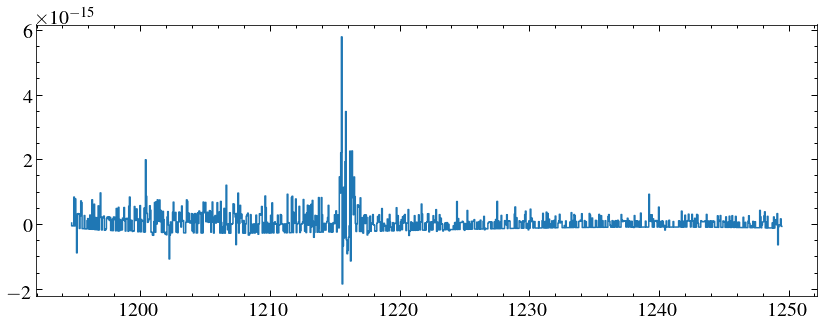

In [65]:
f = []
for x in x1ds:
    data = fits.getdata(x, 1)[0]
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    f.append(data['FLUX'])
w = data['WAVELENGTH']
f = np.mean(np.array(f), axis=0)
plt.step(w,f)

So the objective is to do better than that.

In [66]:
fits.getheader(x1ds[0],0)['XTRACTAB']

'oref$n7p10323o_1dx.fits'

In [67]:
os.environ['oref'] = d1

In [68]:
bg = fits.open(d1+'/n7p10323o_1dx.fits')
bg.info()

Filename: /home/david/work/muscles/trappist-1/hst/g140m_cals/test/n7p10323o_1dx.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  1DX           1 BinTableHDU     79   343R x 18C   [16A, 8A, 1I, 1I, 1E, 1I, 8D, 1E, 1E, 1E, 1E, 1I, 8D, 1I, 12A, 1I, 67A, 67A]   


In [69]:
bgd = bg[1].data

In [70]:
bgd.names

['APERTURE',
 'OPT_ELEM',
 'CENWAVE',
 'SPORDER',
 'EXTRSIZE',
 'NCOEFFSL',
 'SLTCOEFF',
 'BK1SIZE',
 'BK2SIZE',
 'BK1OFFST',
 'BK2OFFST',
 'NCOEFFBK',
 'BKTCOEFF',
 'BACKORD',
 'XTRACALG',
 'MAXSRCH',
 'PEDIGREE',
 'DESCRIP']

In [71]:
bgd['CENWAVE']

array([1425, 1173, 1218, 1222, 1272, 1321, 1371, 1387, 1400, 1420, 1470,
       1518, 1540, 1550, 1567, 1616, 1640, 1665, 1714, 1425, 1173, 1218,
       1222, 1272, 1321, 1371, 1387, 1400, 1420, 1470, 1518, 1540, 1550,
       1567, 1616, 1640, 1665, 1714, 1425, 1173, 1218, 1222, 1272, 1321,
       1371, 1387, 1400, 1420, 1470, 1518, 1540, 1550, 1567, 1616, 1640,
       1665, 1714, 1425, 1173, 1218, 1222, 1272, 1321, 1371, 1387, 1400,
       1420, 1470, 1518, 1540, 1550, 1567, 1616, 1640, 1665, 1714, 1425,
       1173, 1218, 1222, 1272, 1321, 1371, 1387, 1400, 1420, 1470, 1518,
       1540, 1550, 1567, 1616, 1640, 1665, 1714, 1425, 1173, 1218, 1222,
       1272, 1321, 1371, 1387, 1400, 1420, 1470, 1518, 1540, 1550, 1567,
       1616, 1640, 1665, 1714, 1425, 1173, 1218, 1222, 1272, 1321, 1371,
       1387, 1400, 1420, 1470, 1518, 1540, 1550, 1567, 1616, 1640, 1665,
       1714, 1425, 1173, 1218, 1222, 1272, 1321, 1371, 1387, 1400, 1420,
       1470, 1518, 1540, 1550, 1567, 1616, 1640, 16

In [72]:
hdr = fits.getheader(x1ds[0],0)

In [73]:
cw=hdr['CENWAVE']

In [74]:
bgd[(bgd['CENWAVE']==cw) & (bgd['OPT_ELEM']=='G140M') & (bgd['APERTURE']==hdr['APERTURE']+'D1')]

FITS_rec([('52X0.05D1', 'G140M', 1222, 1, 11., 1, [0., 0., 0., 0., 0., 0., 0., 0.], 5., 5., -30., 30., 1, [-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ], 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')],
         dtype=(numpy.record, [('APERTURE', 'S16'), ('OPT_ELEM', 'S8'), ('CENWAVE', '>i2'), ('SPORDER', '>i2'), ('EXTRSIZE', '>f4'), ('NCOEFFSL', '>i2'), ('SLTCOEFF', '>f8', (8,)), ('BK1SIZE', '>f4'), ('BK2SIZE', '>f4'), ('BK1OFFST', '>f4'), ('BK2OFFST', '>f4'), ('NCOEFFBK', '>i2'), ('BKTCOEFF', '>f8', (8,)), ('BACKORD', '>i2'), ('XTRACALG', 'S12'), ('MAXSRCH', '>i2'), ('PEDIGREE', 'S67'), ('DESCRIP', 'S67')]))

In [75]:
hdr['APERTURE']

'52X0.05'

So if I make a new 1dx file with the adjusted background regions and re-reduce with that, it should work?

In [122]:
nbg = fits.open(d1+'/new_bg_1dx.fits')

In [123]:
np.where((bgd['CENWAVE']==cw) & (bgd['OPT_ELEM']=='G140M') & (bgd['APERTURE']==hdr['APERTURE']+'D1'))

(array([60]),)

In [124]:
bgd[60]

('52X0.05D1', 'G140M', 1222, 1, 11.0, 1, array([0., 0., 0., 0., 0., 0., 0., 0.]), 14.0, 14.0, -13.0, 13.0, 1, array([-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ]), 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')

In [125]:
edit = nbg[1].data[60]
edit

('52X0.05D1', 'G140M', 1222, 1, 11.0, 1, array([0., 0., 0., 0., 0., 0., 0., 0.]), 5.0, 5.0, -30.0, 30.0, 1, array([-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ]), 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')

B+ use backround regions of 6 to 20 pixels. How does that convert into what to edit? Where is the width measuered from - before or after the offset? Doesn't say in handbook - helpdesk? Ok bkXoffset is the centre of the background region of width bkXsize. So...bkXsize =14, bkXoffest = 6+14/2 = 13? 

In [126]:
offset = 13
size =14
edit['BK1SIZE'], edit['BK2SIZE'] = size, size
edit['BK1OFFST'], edit['BK2OFFST'] = -offset, offset

In [127]:
edit

('52X0.05D1', 'G140M', 1222, 1, 11.0, 1, array([0., 0., 0., 0., 0., 0., 0., 0.]), 14.0, 14.0, -13.0, 13.0, 1, array([-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ]), 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')

In [128]:
nbg[1].data[60] = edit

In [129]:
nbg[1].data[60]


('52X0.05D1', 'G140M', 1222, 1, 11.0, 1, array([0., 0., 0., 0., 0., 0., 0., 0.]), 14.0, 14.0, -13.0, 13.0, 1, array([-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ]), 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')

In [131]:
nbg.writeto(d1+'/new_bg_1dx.fits', overwrite=True)

In [132]:
nbg = fits.open(d1+'/new_bg_1dx.fits')
nbg[1].data[60]

('52X0.05D1', 'G140M', 1222, 1, 11.0, 1, array([0., 0., 0., 0., 0., 0., 0., 0.]), 14.0, 14.0, -13.0, 13.0, 1, array([-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ]), 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')

Right that seems to have worked, now to try re-reducing the data...

In [133]:
raws = glob.glob(d1+'/*raw.fits')
raws

['/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v02010_raw.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_raw.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01010_raw.fits']

In [134]:
for r in raws:
    print(fits.getheader(r,0)['XTRACTAB'])

oref$new_bg_1dx.fits
oref$new_bg_1dx.fits
oref$new_bg_1dx.fits


In [135]:
for r in raws:
    fits.setval(r, 'XTRACTAB', value ='oref$new_bg_1dx.fits')

In [136]:
for r in raws:
    print(fits.getheader(r,0)['XTRACTAB'])

oref$new_bg_1dx.fits
oref$new_bg_1dx.fits
oref$new_bg_1dx.fits


In [144]:
os.environ['oref'] = d1+'/'

In [147]:
for r in raws:
    rootname = fits.getheader(r,0)['ROOTNAME']
    stistools.calstis.calstis(r, outroot=d1+'/new_x1ds/'+rootname+'_new', wavecal=d1+'/od3v01020_wav.fits', verbose=True, trailer='recal.trl')

Appending to trailer file recal.trl
Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v02010_raw.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v02010_raw.fits', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/new_x1ds/od3v02010_new', '-w', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_wav.fits']
Appending to trailer file recal.trl
Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_raw.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_raw.fits', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/new_x1ds/od3v01020_new', '-w', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_wav.fits']
Appending to trailer file recal.trl
Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01010_raw.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01010_r

Let's see how that went...

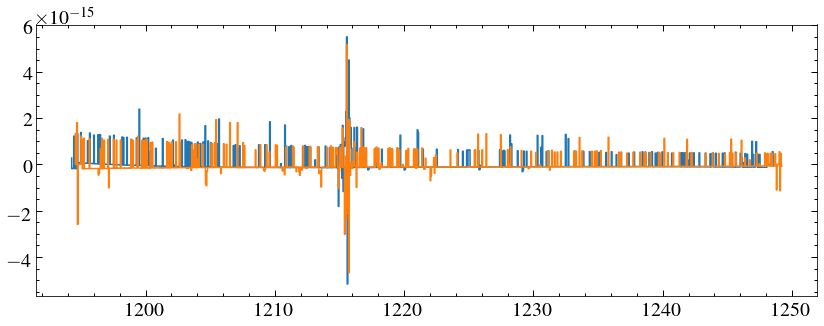

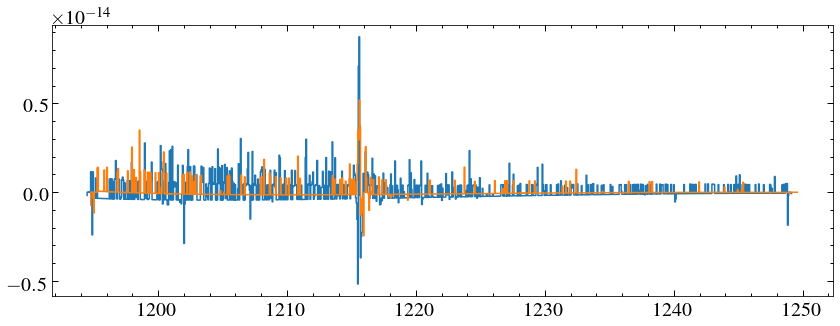

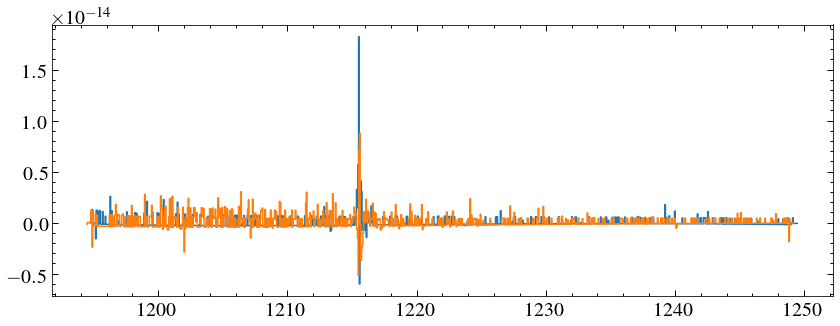

In [150]:
d2 = d1 + '/new_x1ds/'
new_x1ds = glob.glob(d2+'*x1d.fits')
for x, y in zip(new_x1ds, x1ds):
    data = fits.getdata(y, 1)[0]
    plt.step(data['WAVELENGTH'], data['FLUX'])
    data = fits.getdata(x, 1)[0]
    plt.step(data['WAVELENGTH'], data['FLUX'])
    plt.show()

(1212, 1220)

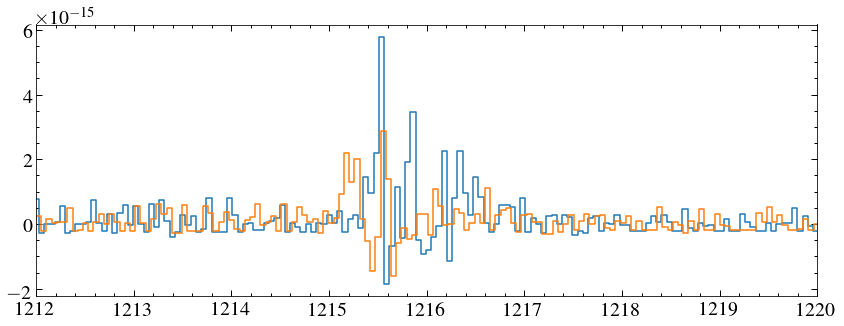

In [152]:
f_new = []
for x in new_x1ds:
    data = fits.getdata(x, 1)[0]
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    f_new.append(data['FLUX'])
w_new = data['WAVELENGTH']
f_new = np.mean(np.array(f_new), axis=0)
plt.step(w,f)
plt.step(w_new,f_new)
plt.xlim(1212, 1220)

Well it's different. Now for the rest. Grabbed a lot of data, hopefull has everything I need...

In [153]:
dates

['all_obs', 'staging', 'test']

In [15]:
d3 = path+'all_obs/'
d4 = path+'all_obs/new_extraction/'

In [124]:
x1ds = glob.glob(d3+'/*x1d.fits')

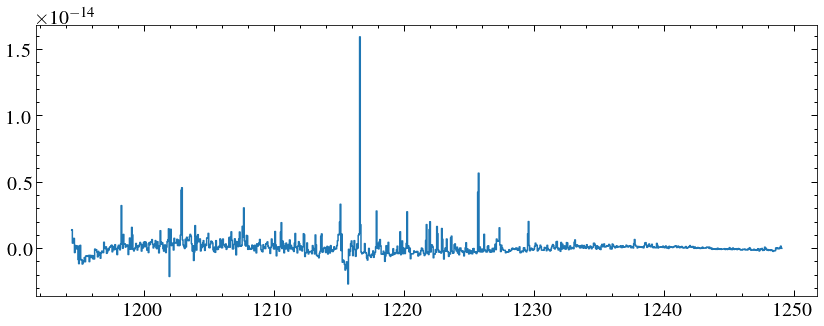

In [125]:
f_old = []
i = 0
for x in x1ds:
    data = fits.getdata(x, 1)[0]
    if i == 0:
        w_old = data['WAVELENGTH']
        f_old.append(data['FLUX'])
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'])(w_new)
        f_old.append(fi)
    i +-1
f_old = np.mean(np.array(f_old), axis=0)
plt.step(w_old,f_old)

In [20]:
raws = glob.glob(d3+'/*raw.fits')

In [160]:
for r in raws:
    fits.setval(r, 'XTRACTAB', value ='oref$new_bg_1dx.fits')

In [16]:
os.environ['oref'] = d3

In [164]:
for r in raws:
    rootname = fits.getheader(r,0)['ROOTNAME']
    stistools.calstis.calstis(r, outroot=d4+rootname+'_new', wavecal=d1+'/od3v01020_wav.fits', verbose=True, trailer='full_recal.trl')

Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhsb1040_raw.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhsb1040_raw.fits', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/new_extraction/odhsb1040_new', '-w', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_wav.fits']
Appending to trailer file full_recal.trl
Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs31040_raw.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs31040_raw.fits', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/new_extraction/odhs31040_new', '-w', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_wav.fits']
Appending to trailer file full_recal.trl
Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs31050_raw.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/o

In [166]:
new_x1ds = glob.glob(d4+'/*x1d.fits')

(1212, 1220)

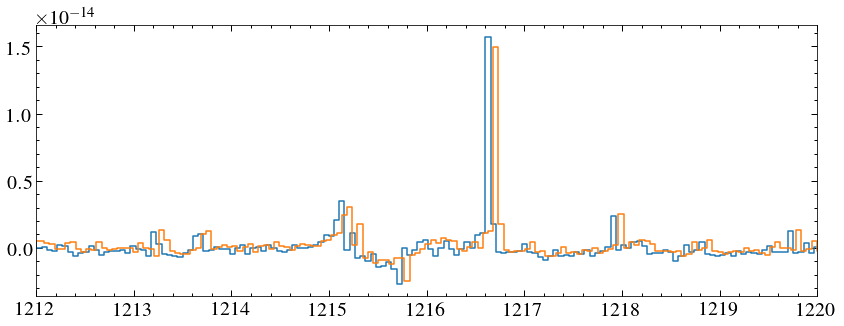

In [168]:
f_new = []
for x in new_x1ds:
    data = fits.getdata(x, 1)[0]
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    f_new.append(data['FLUX'])
w_new = data['WAVELENGTH']
f_new = np.mean(np.array(f_new), axis=0)
plt.step(w_old,f_old)
plt.step(w_new,f_new)
plt.xlim(1212, 1220)

Now sort by date.

In [174]:
dates =[]
for x in new_x1ds:
    date = fits.getheader(x, 0)['TDATEOBS']
    dates.append(date)

In [177]:
dates = np.unique(dates)
dates

array(['2016-09-26', '2016-09-30', '2016-11-23', '2016-12-25',
       '2017-09-03', '2017-09-04', '2017-09-14', '2017-09-17',
       '2017-09-22', '2017-09-28', '2017-10-13', '2017-10-17',
       '2017-10-18', '2017-11-09', '2017-11-13', '2018-05-06',
       '2018-05-31', '2018-08-05', '2018-09-10', '2018-09-11',
       '2018-12-01', '2018-12-07', '2018-12-09'], dtype='<U10')

In [178]:
f_dates = []

In [180]:
for d in dates:
    fd = []
    for x in new_x1ds:
        if fits.getheader(x, 0)['TDATEOBS'] == d:
            data = fits.getdata(x, 1)[0]
            fd.append(data['FLUX'])
    fd = np.mean(np.array(fd), axis=0)
    f_dates.append(fd)
    

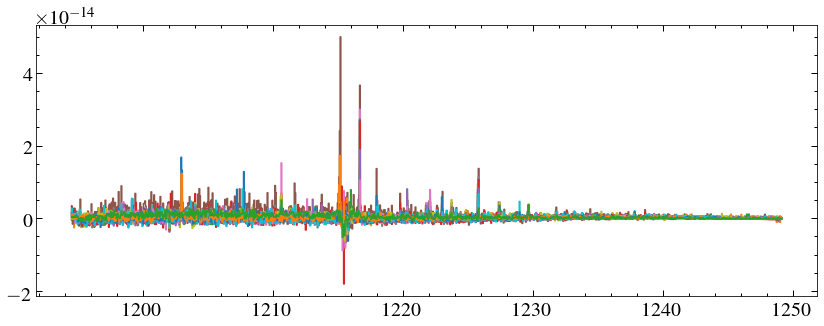

In [181]:
for fi in f_dates:
    plt.step(w_new, fi)

In [245]:
f_month = []
w_month = []
e_month = []
months = np.unique([d[:-3] for d in dates])
for d in months:
    fd = []
    ed = []
    i =0
    for x in new_x1ds:
        if fits.getheader(x, 0)['TDATEOBS'][:-3] == d:
            data = fits.getdata(x, 1)[0]
            if i == 0:
                wd = data['WAVELENGTH']
                fd.append(data['FLUX'])
                ed.append(data['ERROR'])
                w_month.append(wd) 
            else:
                fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'],fill_value='extrapolate')(wd)
                fd.append(fi)
                ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'],fill_value='extrapolate')(wd)
                ed.append(ei)
            i += 1
    fd = np.mean(np.array(fd), axis=0)
    ed = np.mean(np.array(ed), axis=0)
    f_month.append(fd)
    e_month.append(ed)

2016-09


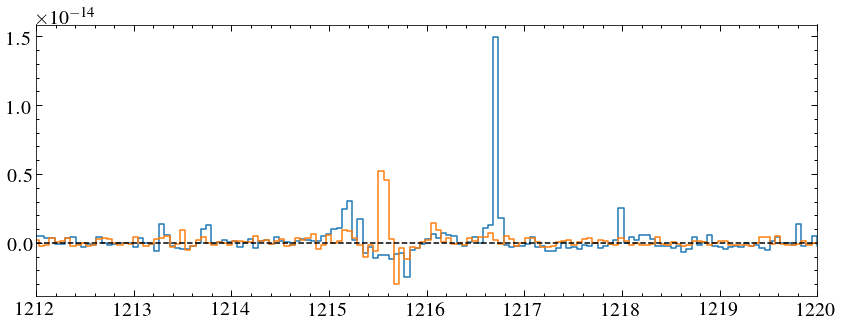

2016-11


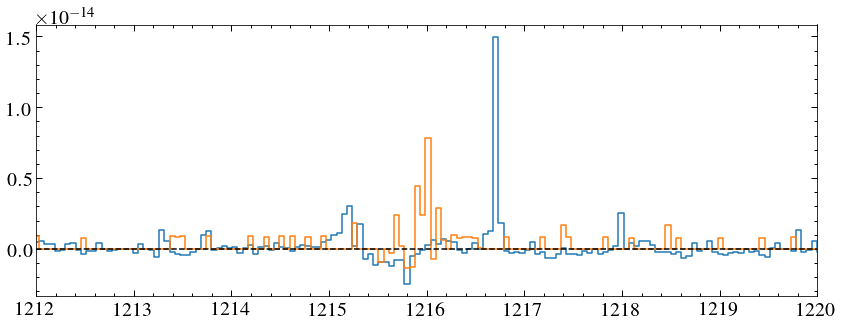

2016-12


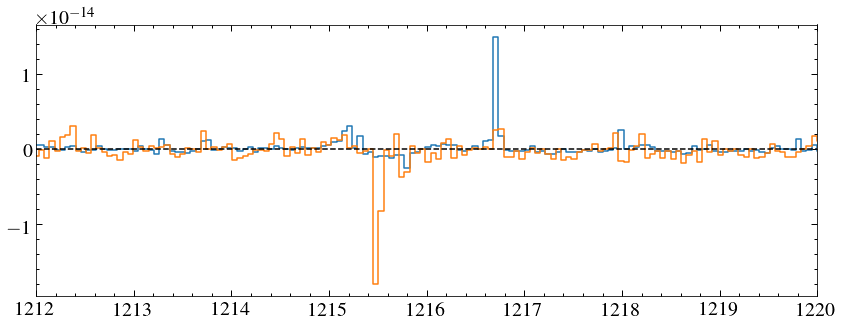

2017-09


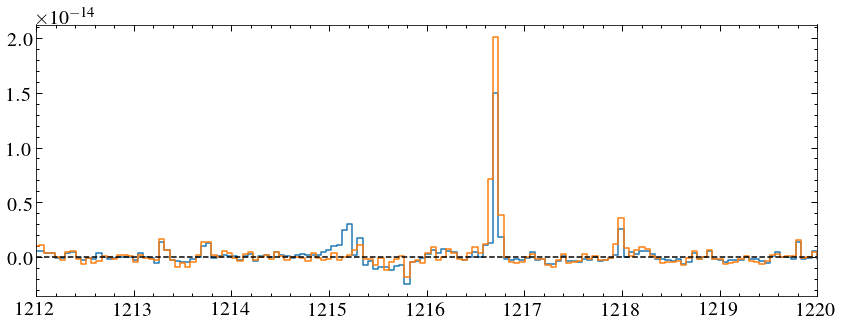

2017-10


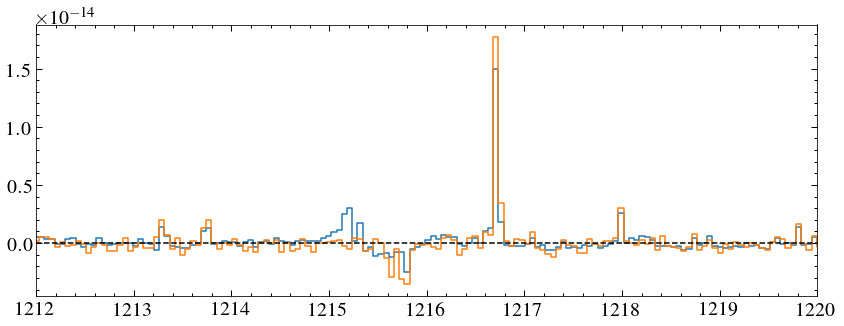

2017-11


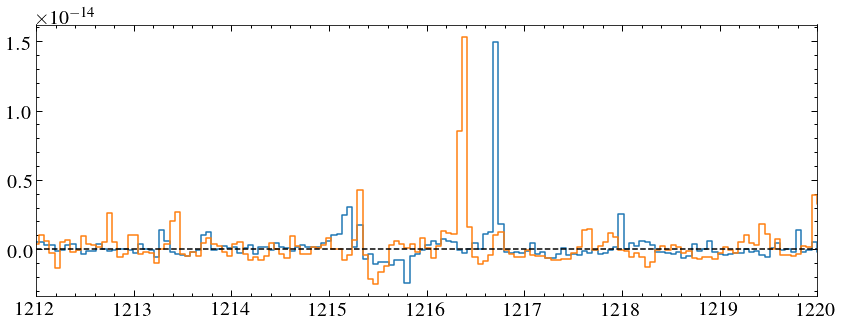

2018-05


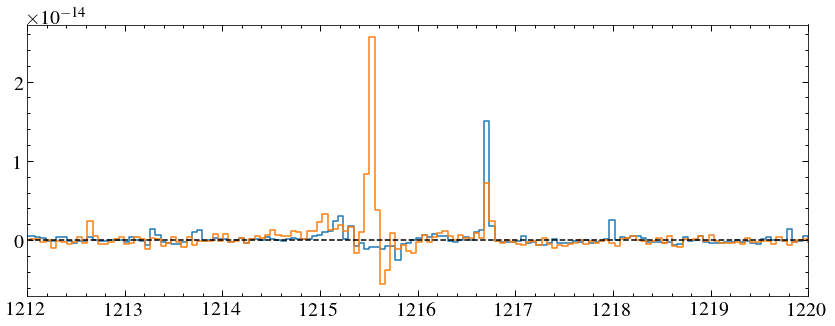

2018-08


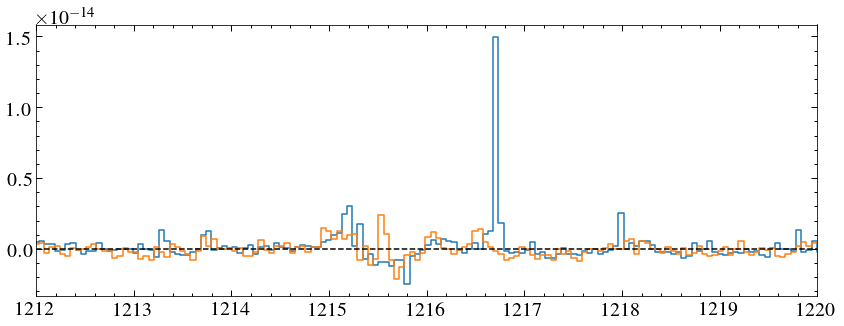

2018-09


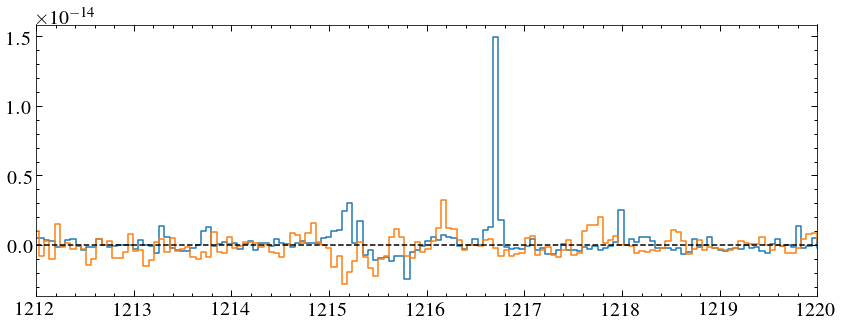

2018-12


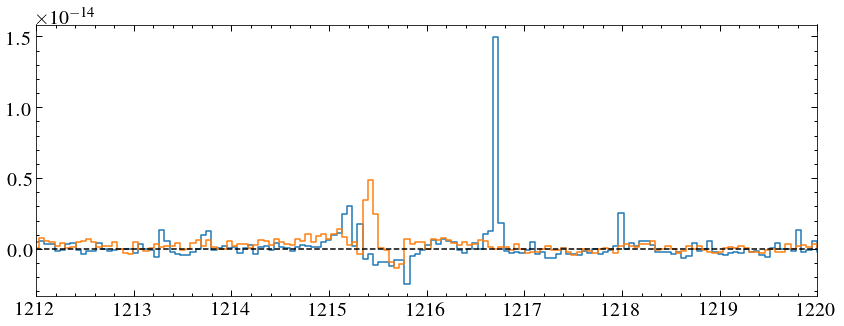

In [243]:
for wi, fi, m in zip(w_month,f_month,months) :
    plt.step(w_new, f_new)
    plt.step(w_new, fi)
    plt.xlim(1212, 1220)
    print(m)
    plt.axhline(0, c='k', ls ='--')
    plt.show()


In [197]:
len(f_month)

10

have I actually improved?

(1212, 1220)

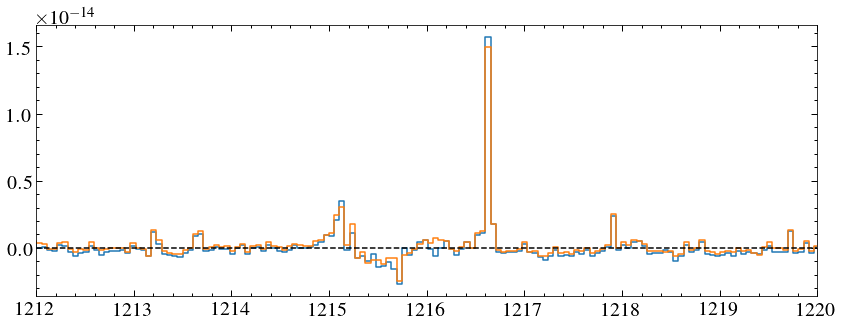

In [212]:
plt.step(w_old,f_old)
plt.step(w_old,f_new)
plt.axhline(0, c='k', ls ='--')
plt.xlim(1212, 1220)

In [209]:
old_month = []
#months = np.unique([d[:-3] for d in dates])
for d in months:
    fd = []
    i = 0
    for x in x1ds:
        if fits.getheader(x, 0)['TDATEOBS'][:-3] == d:
            data = fits.getdata(x, 1)[0]
                if i == 0:
        w_new2 = data['WAVELENGTH']
        f_new2.append(data['FLUX'])
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'])(w_new2)
        f_new2.append(fi)
            fd.append(data['FLUX'])
    fd = np.mean(np.array(fd), axis=0)
    old_month.append(fd)

2016-09


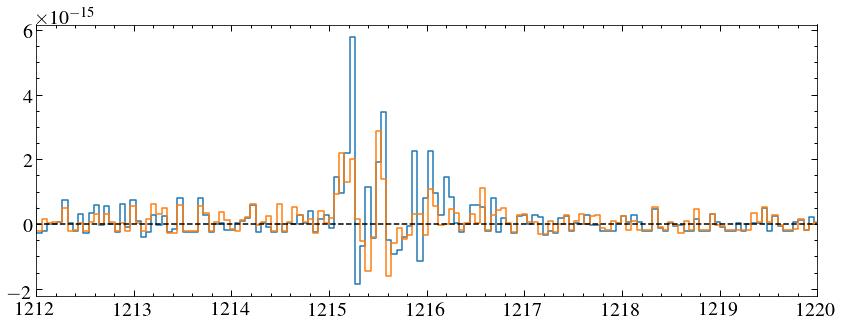

2016-11


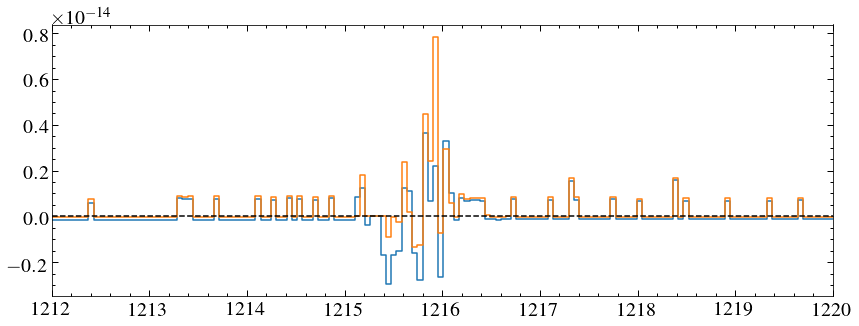

2016-12


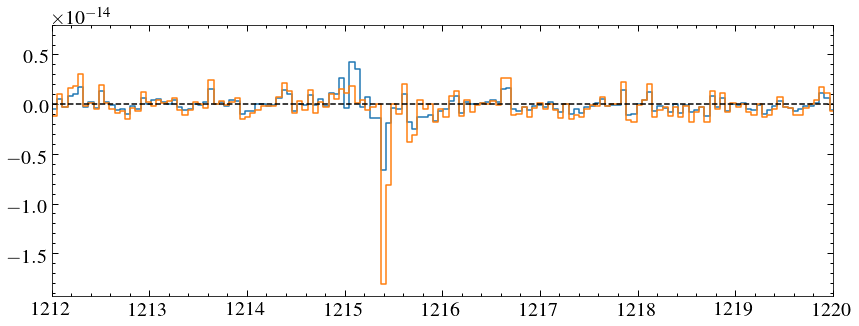

2017-09


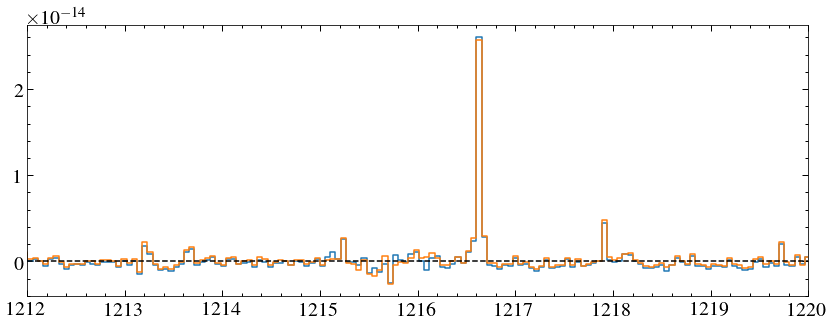

2017-10


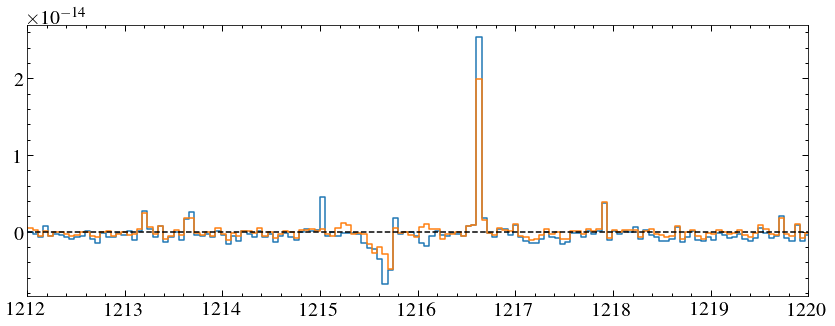

2017-11


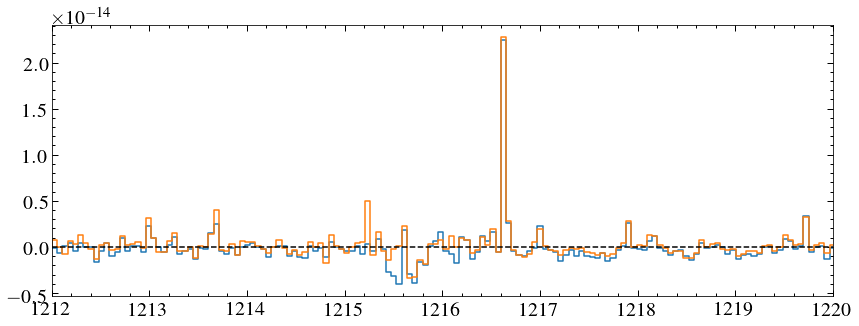

2018-05


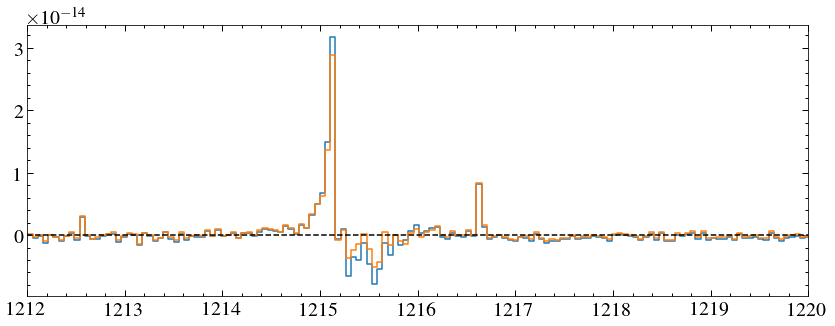

2018-08


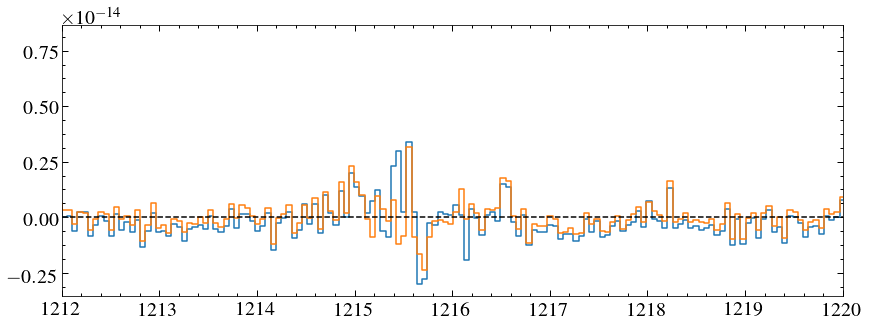

2018-09


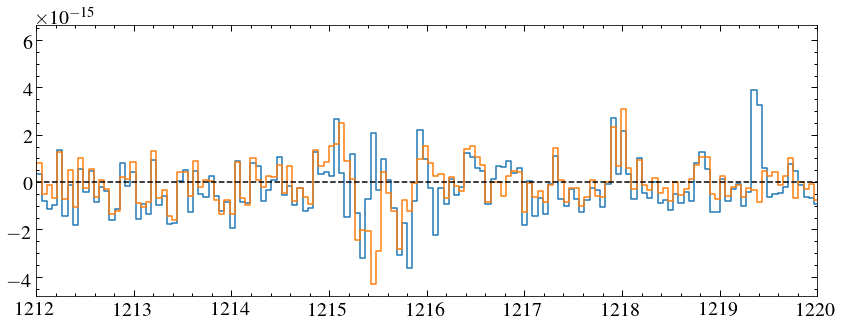

2018-12


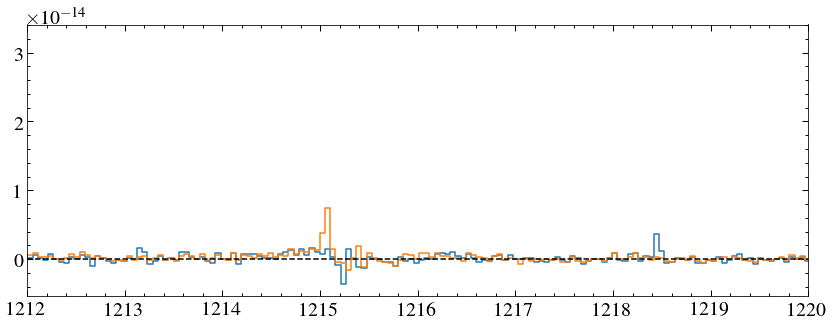

In [213]:
for fi, fo, m in zip(f_month,old_month, months) :
    plt.step(w_old, fo)
    plt.step(w_old, fi)
    plt.xlim(1212, 1220)
    print(m)
    plt.axhline(0, c='k', ls ='--')
    plt.show()

Need to do some wavelength interpolation in my coadds

5.800559275563544e-16 1.0488375149203997e-15


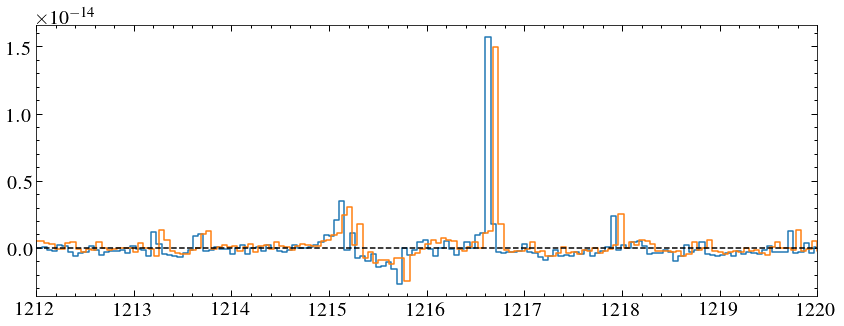

In [225]:
f_new = []
i = 0
for x in new_x1ds:
    data = fits.getdata(x, 1)[0]
    if i == 0:
        w_new = data['WAVELENGTH']
        f_new.append(data['FLUX'])
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'])(w_new)
        f_new.append(fi)
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    #f_new.append(data['FLUX'])
    i +-1
#w_new = data['WAVELENGTH']
f_new = np.mean(np.array(f_new), axis=0)
plt.step(w_old,f_old)
plt.step(w_new,f_new)
plt.xlim(1212, 1220)
plt.axhline(0, c='k', ls ='--')
old_int = np.trapz(f_old[(w_old >1214) & (w_old <1218)], w_old[(w_old >1214) & (w_old <1218)])
new_int = np.trapz(f_new[(w_new >1214) & (w_new <1218)], w_new[(w_new >1214) & (w_new <1218)])
print(old_int, new_int)

What about an only 5-pixel wide bg?

In [227]:
offset = 13
size =5
edit['BK1SIZE'], edit['BK2SIZE'] = size, size
edit['BK1OFFST'], edit['BK2OFFST'] = -offset, offset
nbg[1].data[60] = edit
nbg.writeto(d3+'new_bg2_1dx.fits', overwrite=True)
nbg = fits.open(d3+'new_bg2_1dx.fits')
nbg[1].data[60]

('52X0.05D1', 'G140M', 1222, 1, 11.0, 1, array([0., 0., 0., 0., 0., 0., 0., 0.]), 5.0, 5.0, -13.0, 13.0, 1, array([-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ]), 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')

In [228]:
for r in raws:
    fits.setval(r, 'XTRACTAB', value ='oref$new_bg2_1dx.fits')

In [229]:
for r in raws:
    rootname = fits.getheader(r,0)['ROOTNAME']
    stistools.calstis.calstis(r, outroot=d4+rootname+'_new2', wavecal=d1+'/od3v01020_wav.fits', trailer='full_recal2.trl')

5.800559275563544e-16 4.668669508573373e-16


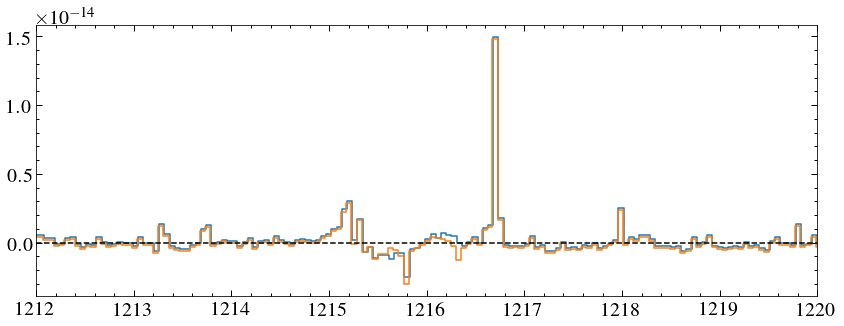

In [238]:
f_new2 = []
i = 0
new2_x1ds = glob.glob(d4+'*new2_x1d.fits')
for x in new2_x1ds:
    data = fits.getdata(x, 1)[0]
    if i == 0:
        w_new2 = data['WAVELENGTH']
        f_new2.append(data['FLUX'])
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'])(w_new2)
        f_new2.append(fi)
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    #f_new.append(data['FLUX'])
    i +-1
#w_new = data['WAVELENGTH']
f_new2 = np.mean(np.array(f_new2), axis=0)
#plt.step(w_old,f_old)
plt.step(w_new, f_new)
plt.step(w_new2,f_new2)
plt.xlim(1212, 1220)
plt.axhline(0, c='k', ls ='--')
old_int = np.trapz(f_old[(w_old >1214) & (w_old <1218)], w_old[(w_old >1214) & (w_old <1218)])
new_int = np.trapz(f_new2[(w_new2 >1214) & (w_new2 <1218)], w_new2[(w_new2 >1214) & (w_new2 <1218)])
print(old_int, new_int)

In [253]:
f_new = []
e_new = []
i = 0
new_x1ds = glob.glob(d4+'*new_x1d.fits')
for x in new_x1ds:
    data = fits.getdata(x, 1)[0]
    if i == 0:
        w_new = data['WAVELENGTH']
        f_new.append(data['FLUX'])
        e_new.append(data['ERROR'])
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'])(w_new)
        f_new.append(fi)
        ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'])(w_new)
        e_new.append(ei)
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    #f_new.append(data['FLUX'])
    i +-1
#w_new = data['WAVELENGTH']
f_new = np.mean(np.array(f_new), axis=0)
e_new = np.mean(np.array(e_new), axis=0)


In [257]:
data = Table([w_new*u.AA, f_new*u.erg/u.cm**2/u.s/u.AA, e_new*u.erg/u.cm**2/u.s/u.AA], names = ['WAVELENGTH', 'FLUX', 'ERROR'] )
ascii.write(data, 'new_bk_means/TRAPPIST-1_G140M_newbk_mean.ecsv', delimiter=',', format='ecsv', overwrite=True)

In [258]:
for w_m, f_m, e_m, month in zip(w_month, f_month, e_month, months):
    data = Table([w_m*u.AA, f_m*u.erg/u.cm**2/u.s/u.AA, e_m*u.erg/u.cm**2/u.s/u.AA], names = ['WAVELENGTH', 'FLUX', 'ERROR'] )
    ascii.write(data, 'new_bk_means/TRAPPIST-1_G140M_newbk_mean_'+month+'.ecsv', delimiter=',', format='ecsv', overwrite=True)

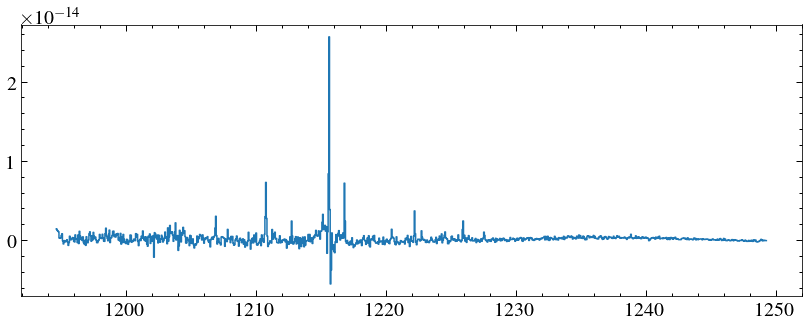

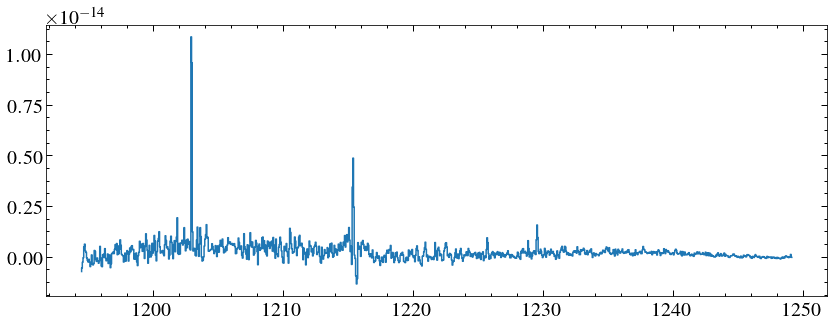

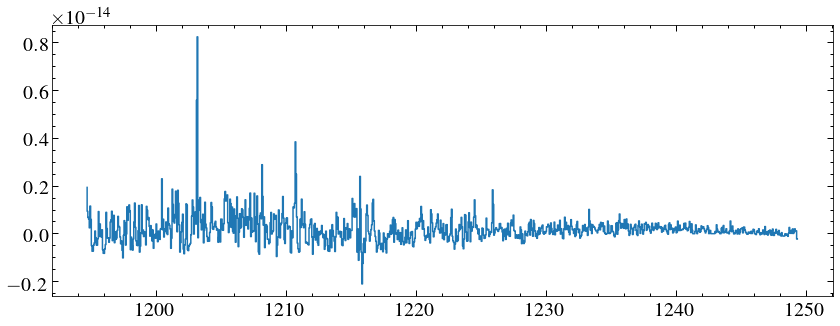

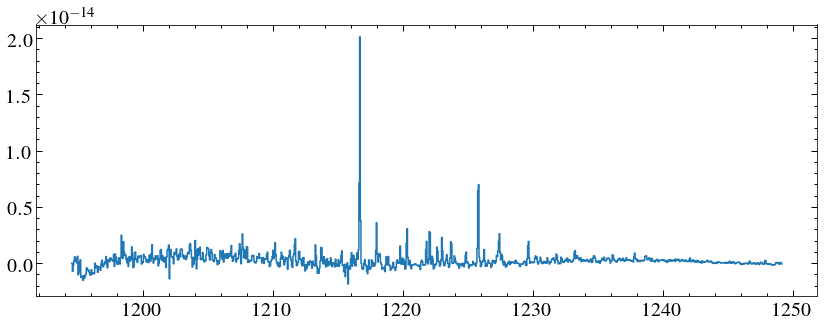

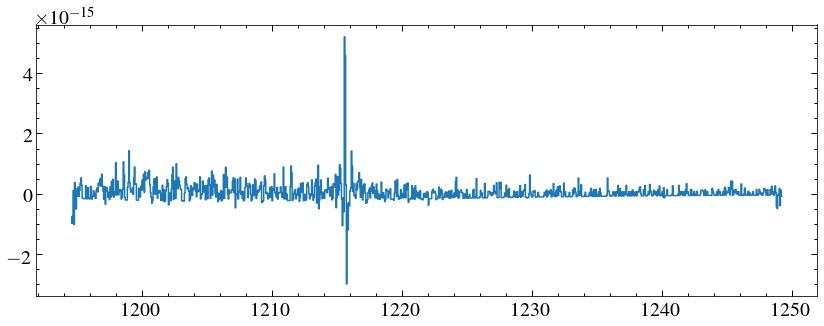

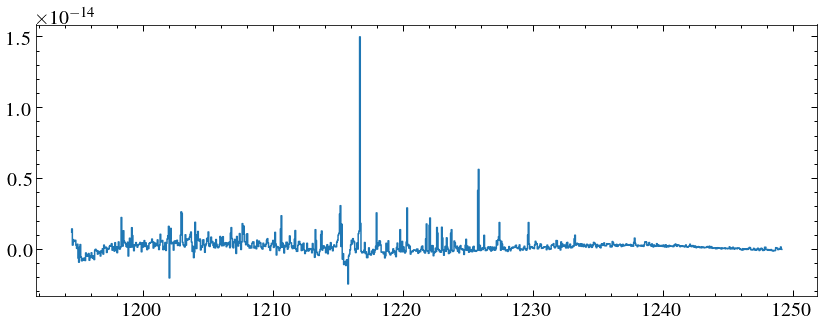

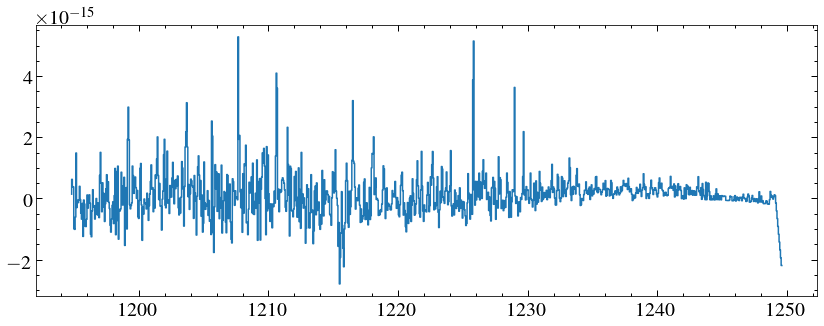

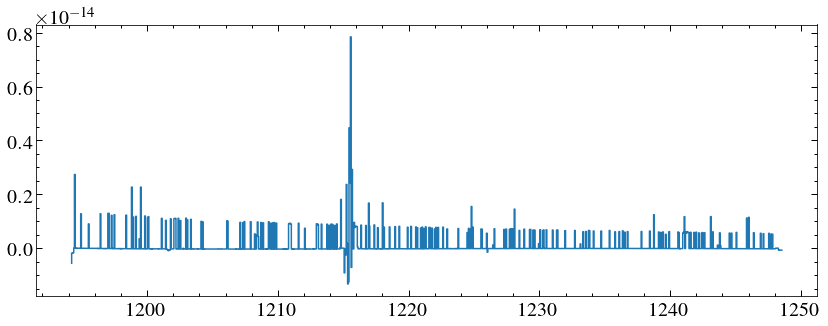

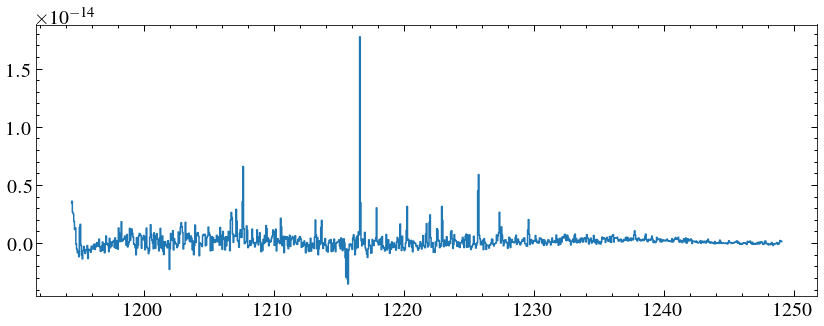

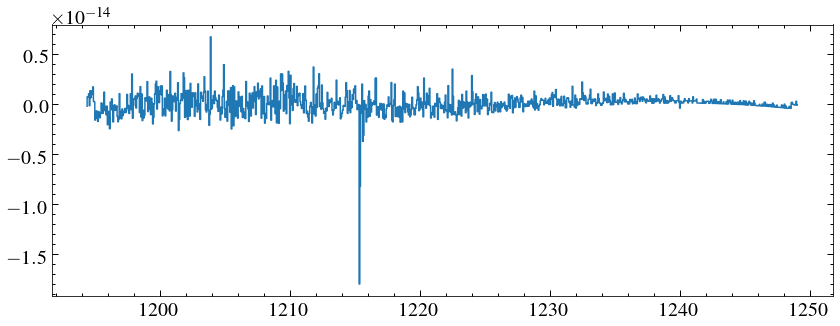

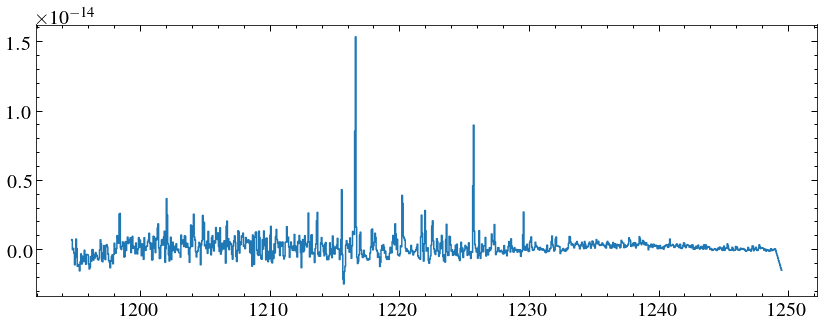

In [259]:
for sp in os.listdir('new_bk_means'):
    dt = Table.read('new_bk_means/'+sp)
    plt.step(dt['WAVELENGTH'], dt['FLUX'])
    plt.show()

20190503 so it's not the best reduction. What about the plan of combining the 2d images, then extracting from that? What does a 2d spectrum look like? oops didn't download any, hang about...

In [260]:
d3

'/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/'

In [17]:
x2ds = glob.glob(d3+'*x2d.fits')

In [265]:
hdul = fits.open(x2ds[0])
hdul.info()

Filename: /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs08020_x2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     276   ()      
  1  SCI           1 ImageHDU       120   (1201, 1201)   float32   
  2  ERR           1 ImageHDU        61   (1201, 1201)   float32   
  3  DQ            1 ImageHDU        44   (1201, 1201)   int16   


In [289]:
data = hdul[1].data

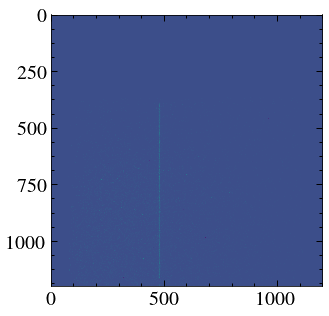

In [268]:
plt.imshow(data)

In [269]:
data2 = fits.getdata(x2ds[1], 1)

In [270]:
data_add = data+data2

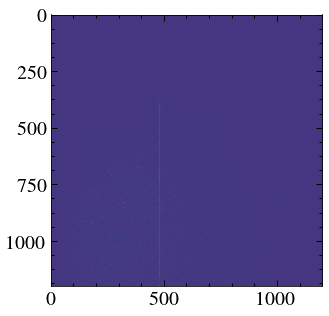

In [271]:
plt.imshow(data_add)

that maybe worked?

In [272]:
data_add = data
for x in x2ds[1:]:
    dt = fits.getdata(x,1)
    data_add = data_add+dt

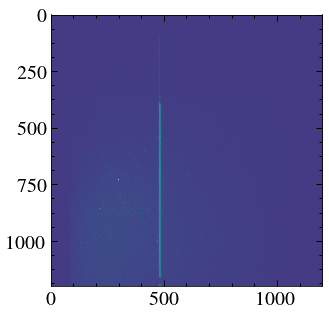

In [273]:
plt.imshow(data_add)

Very rough extraction...

In [276]:
data_add.shape

(1201, 1201)

In [277]:
xaxis = np.arange(len(data_add))

In [284]:
f_add = []
for d in data_add:
    int_line = np.trapz(d)
    f_add.append(int_line)

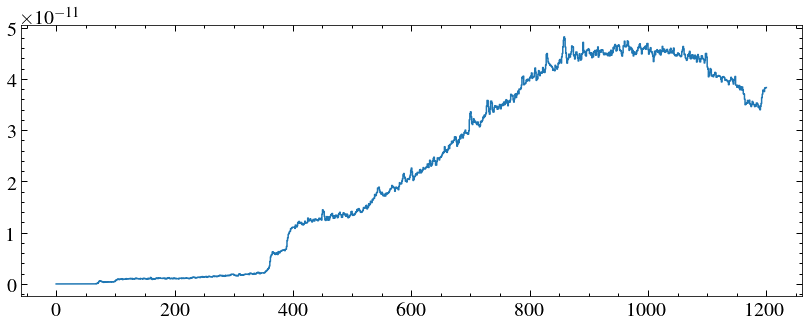

In [287]:
plt.step(xaxis, np.array(f_add)/len(x2ds))

Ok so the 2d images aren't calibrated or anything?

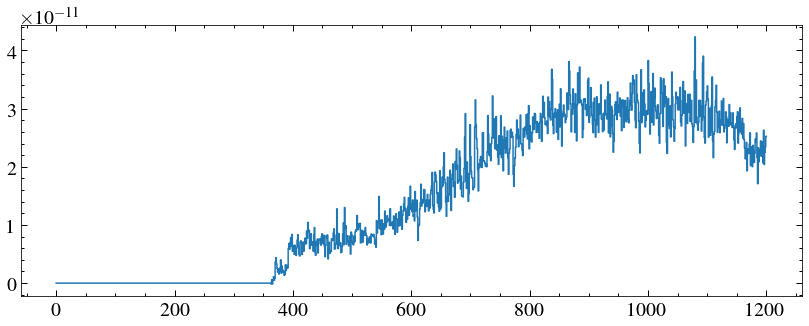

In [291]:
f= []
for d in data:
    int_line = np.trapz(d)
    f.append(int_line)
plt.step(xaxis, f)

Yup not calibrated.

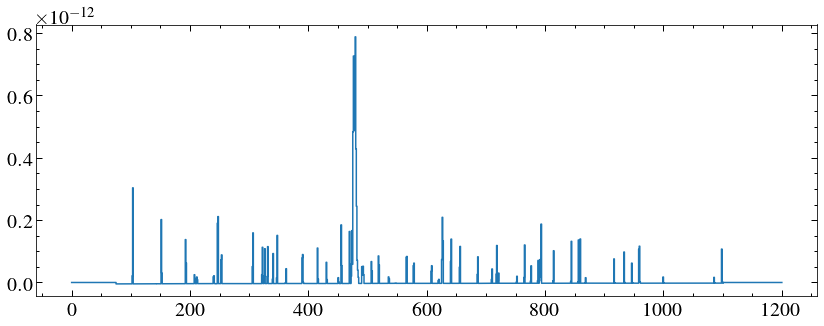

In [295]:
plt.step(xaxis, data[500])

In [296]:
hdul.close()

Check- is the trace in the 2d images just airglow? Compare with a spectrum with detected flux.

In [10]:
check_data = fits.getdata('/home/david/work/muscles/MegaMUSCLES/GJ_674/HST/STIS/odlm21030_x2d.fits', 1)

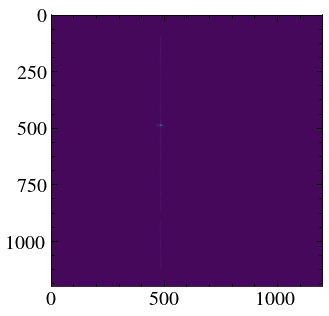

In [11]:
plt.imshow(check_data)

Good it's clear in that one, can see the airglow. Does calstis work on a 2d file?

In [18]:
x2ds[0]

'/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs08020_x2d.fits'

In [19]:
stistools.calstis.calstis(x2ds[0], outroot='odhs08020_2d_check', wavecal=d3+'od3v01020_wav.fits', verbose=True, trailer='2d_recal_test.trl')

Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs08020_x2d.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs08020_x2d.fits', 'odhs08020_2d_check', '-w', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/od3v01020_wav.fits']


1

Clearly not. Can I combine the "raw" files

In [39]:
hdul = fits.open(raws[0])

In [23]:
hdul.info()

Filename: /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhsb1040_raw.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     207   ()      
  1  SCI           1 ImageHDU       120   (2048, 2048)   int32   
  2  ERR           1 ImageHDU        62   ()      
  3  DQ            1 ImageHDU        47   ()      


In [24]:
raw_data = hdul[1].data

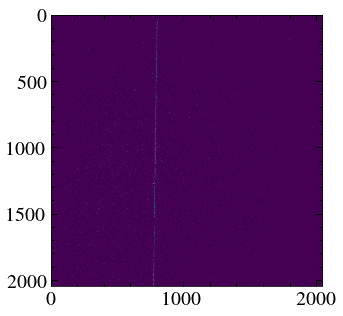

In [91]:
plt.imshow(raw_data)
#plt.savefig('t1_raw.png', dpi=150)

That's more promising.

In [26]:
raw_data_add = raw_data
for x in raws[1:]:
    dt = fits.getdata(x,1)
    raw_data_add = raw_data_add+dt

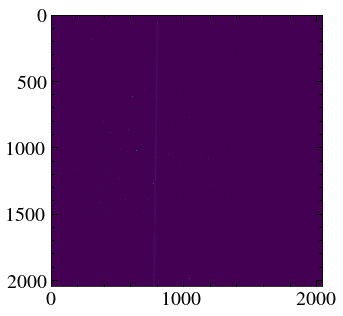

In [27]:
plt.imshow(raw_data_add)

Game of Thrones was good practice for this...

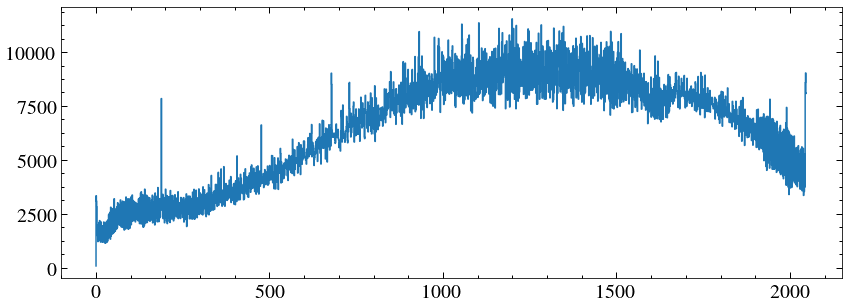

In [29]:
xaxis = np.arange(len(raw_data_add))
f_add = []
for d in raw_data_add:
    int_line = np.trapz(d)
    f_add.append(int_line)
plt.step(xaxis, f_add)

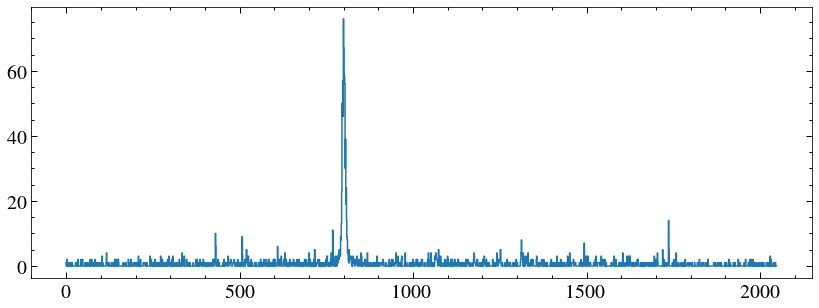

In [30]:
plt.step(xaxis, raw_data_add[100])

Now try to make a fake raw_file- need to change data and exposure time.

In [33]:
all_exptime = 0
for r in raws:
    all_exptime += fits.getheader(r, 0)['TEXPTIME']
all_exptime

173224.677

In [40]:
hdul[0].header['TEXPTIME'] = all_exptime

In [41]:
hdul[1].data = raw_data_add

In [42]:
hdul.writeto(d3+'combined_raw.fits', overwrite=True)

In [43]:
hdul.close()

In [44]:
hdul = fits.open(d3+'combined_raw.fits')

In [45]:
hdul[0].header['TEXPTIME']

173224.677

In [46]:
data = hdul[1].data

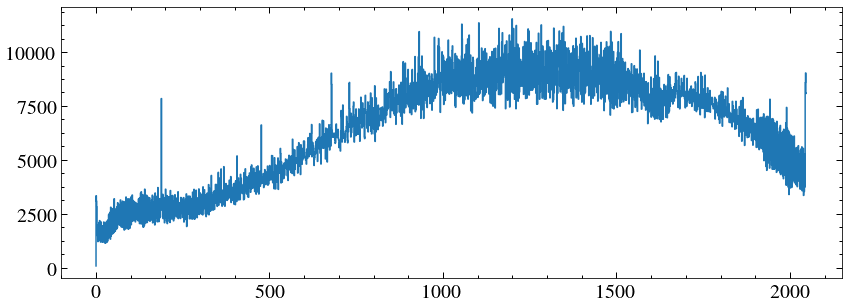

In [47]:
xaxis = np.arange(len(data))
f_add = []
for d in data:
    int_line = np.trapz(d)
    f_add.append(int_line)
plt.step(xaxis, f_add)

Cracking. Put the old bk file back.

In [48]:
hdul[0].header['XTRACTAB']

'oref$new_bg2_1dx.fits'

In [52]:
hdul[0].header['XTRACTAB'] = 'oref$n7p10323o_1dx.fits'

In [53]:
hdul.writeto(d3+'combined_raw.fits', overwrite=True)

In [54]:
stistools.calstis.calstis(d3+'combined_raw.fits', outroot='combined_raw_x1d', wavecal=d3+'od3v01020_wav.fits', verbose=True, trailer='combined_raw.trl')

Appending to trailer file combined_raw.trl
Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/combined_raw.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/combined_raw.fits', 'combined_raw_x1d', '-w', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/od3v01020_wav.fits']


0

Extraction seems to have worked, let's have a look:

In [56]:
data = fits.getdata('combined_raw_x1d_x1d.fits',1)[0]

(0, 5)

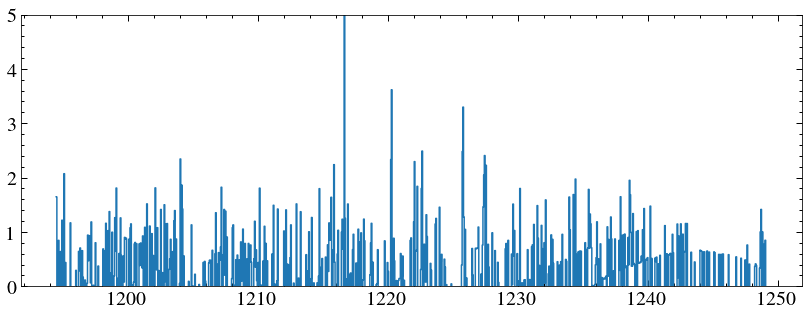

In [90]:
#plt.step(data['WAVELENGTH'], data['FLUX'])
#plt.step(data['WAVELENGTH'], data['ERROR'])
plt.step(data['WAVELENGTH'], data['FLUX']/data['ERROR'])
#plt.step(w_old, f_old)
#plt.xlim(1214, 1219)
plt.ylim(0,5)

So worse, but more flux around Lya. So this technique works in principle. Need to adjust trace and wavecal for each observation before combining.

In [68]:
#fits.getheader(raws[0],0)

Presumably each spectrum has a trace fit in the xld spectrum?

In [67]:
#fits.getheader(x1ds[0], 0)

Quick try with the new bk file

In [69]:
hdul.close()

In [70]:
hdul = fits.open(d3+'combined_raw.fits')
hdul[0].header['XTRACTAB'] = 'oref$new_bg_1dx.fits'
hdul.writeto(d3+'combined_raw_newbk.fits', overwrite=True)

In [82]:
stistools.calstis.calstis(d3+'combined_raw_newbk.fits', outroot='combined_raw_new_bk', wavecal=d3+'od3v01020_wav.fits', verbose=True, trailer='combined_raw.trl')

Appending to trailer file combined_raw.trl
Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/combined_raw_newbk.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/combined_raw_newbk.fits', 'combined_raw_new_bk', '-w', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/od3v01020_wav.fits']


0

In [85]:
data2 = fits.getdata('combined_raw_new_bk_x1d.fits',1)[0]

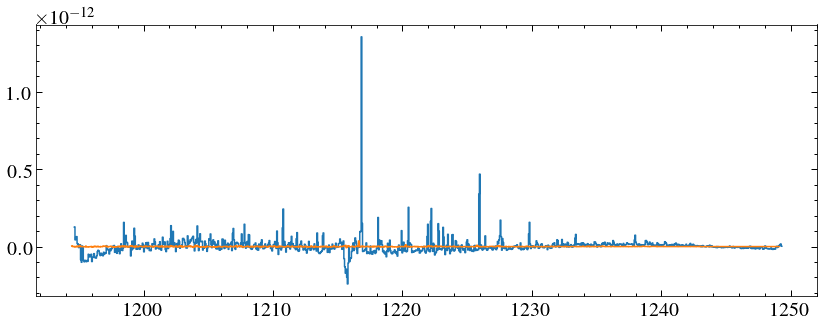

In [86]:
plt.step(data2['WAVELENGTH'], data2['FLUX'])
plt.step(data['WAVELENGTH'], data['FLUX'])


In [87]:
hdul[0].header['TEXPTIME']

173224.677

Huh?

STScI says use the flt files...which I did not retreve, tum te tum..

In [67]:
flts = glob.glob(d3+'*flt.fits')


In [101]:
hdul = fits.open(flts[0])

In [102]:
hdul.info()

Filename: /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/oddv01030_flt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     237   ()      
  1  SCI           1 ImageHDU       120   (1024, 1024)   float32   
  2  ERR           1 ImageHDU        61   (1024, 1024)   float32   
  3  DQ            1 ImageHDU        44   (1024, 1024)   int16   


In [137]:
data = hdul[1].data
error = hdul[2].data

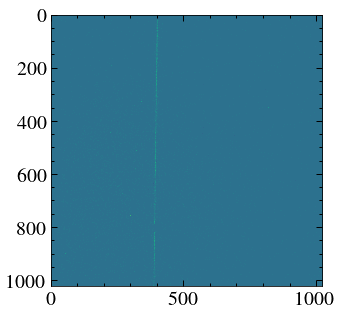

In [104]:
plt.imshow(data)

So do I just run calstis on the flt file?

In [105]:
stistools.calstis.calstis(flts[0], outroot='flt_test', wavecal=d3+'od3v01020_wav.fits', verbose=True, trailer='flt_test.trl')

Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/oddv01030_flt.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/oddv01030_flt.fits', 'flt_test', '-w', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/od3v01020_wav.fits']


0

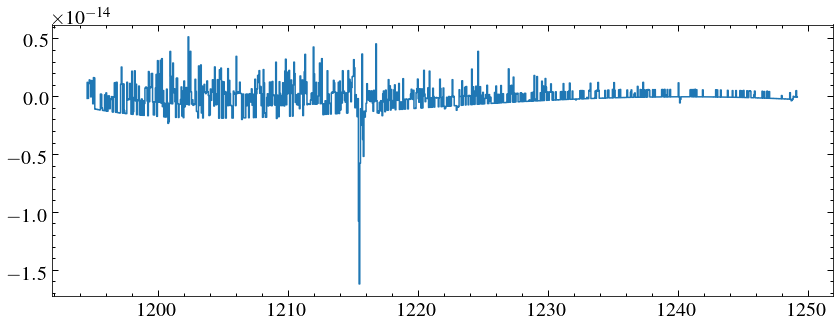

In [108]:
dt = fits.getdata('flt_test_x1d.fits', 1)[0]
plt.step(dt['WAVELENGTH'], dt['FLUX'])

Ok. Simple stack first...

In [138]:
flt_data = data
flt_error = error
for x in flts[1:]:
    dt = fits.getdata(x,1)
    er = fits.getdata(x,2)
    flt_data = flt_data+dt
    flt_error = flt_error+er

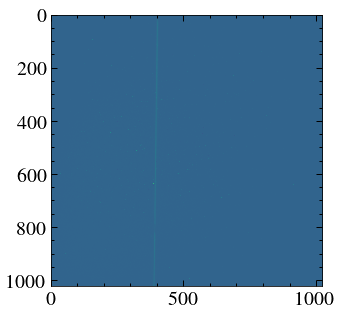

In [110]:
plt.imshow(flt_data)

In [111]:
all_exptime = 0
for r in flts:
    all_exptime += fits.getheader(r, 0)['TEXPTIME']
all_exptime

173224.67699999997

In [139]:
hdul[0].header['TEXPTIME'] = all_exptime
hdul[1].header['EXPTIME'] = all_exptime
hdul[1].data = flt_data
hdul[2].data = flt_error
hdul.writeto(d3+'combined_flt.fits', overwrite=True)

In [140]:
stistools.calstis.calstis(d3+'combined_flt.fits', outroot='combined_flt', wavecal=d3+'od3v01020_wav.fits', verbose=True, trailer='flt_v1.trl')

Appending to trailer file flt_v1.trl
Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/combined_flt.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/combined_flt.fits', 'combined_flt', '-w', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/od3v01020_wav.fits']


0

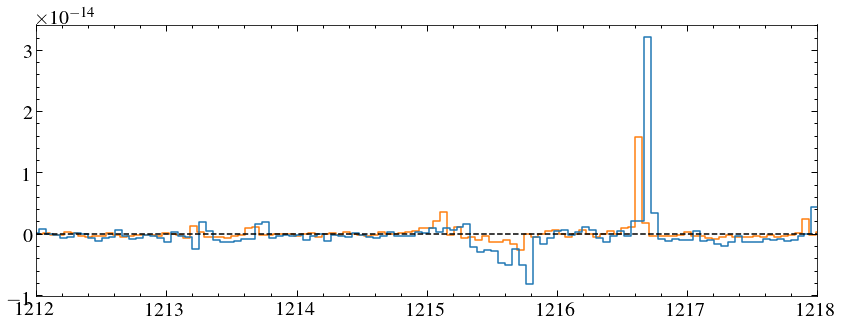

In [142]:
dt = fits.getdata('combined_flt_x1d.fits', 1)[0]
plt.step(dt['WAVELENGTH'], dt['FLUX'])
plt.step(w_old, f_old, zorder=-1)
plt.xlim(1212, 1218)
plt.axhline(0, c='k', ls='--')

Marginal improvement? Nope- worse!

In [136]:
hdul.info()

Filename: /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/oddv01030_flt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     237   ()      
  1  SCI           1 ImageHDU       121   (1024, 1024)   float32   
  2  ERR           1 ImageHDU        61   (1024, 1024)   float32   
  3  DQ            1 ImageHDU        44   (1024, 1024)   int16   


In [144]:
hdul[1].header['SHIFTA2']

4.75166024947

In [146]:
for r in flts:
    print(fits.getheader(r, 1)['SHIFTA1'], fits.getheader(r, 1)['SHIFTA2'])

-3.808384166807 4.75166024947
-2.745840972696 9.486983008328
-0.2702130738611 14.78279109553
-0.5451749082938 16.00686252708
-2.694898720281 18.78741710821
-0.622812724411 10.01115650223
-0.7558197333979 9.55768740597
-1.466253730951 17.07063834407
-2.727435865255 19.33469882125
-3.471382730045 5.162082948156
-2.854381525355 12.14340585359
-4.071677033202 6.647516019678
-3.826753431558 3.188286538787
-3.919187190237 6.420487957911
-1.109222929953 11.64820433678
-1.452699189034 18.34384601941
-3.564923098302 6.669473885808
-1.079470705708 7.905730453671
-0.8238295463292 10.87830533037
-0.9968147634435 17.46440318437
-1.345257449702 18.36379553577
-1.066179011239 16.92680332566
-1.910582743346 16.80273745951
-1.010451171146 8.265288869756
-3.816523868787 -13.68182569872
-2.947311417377 6.738951658188
-0.6487016538793 18.69346706269
-0.6945937555792 11.04540762228
-2.826887902358 26.97989623288
-0.7317038716303 15.58568758828
-0.4977894774474 14.65331357412
-1.001566101753 16.78203941098


Question: is the thing I've been looking at just background?

In [19]:
hdul = fits.open(flts[0])
data = hdul[1].data


In [43]:
hdul[1].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1024 / length of data axis 1                          
NAXIS2  =                 1024 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2018-06-26' / date this file was written (yyyy-mm-dd)                
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'oddv01030        

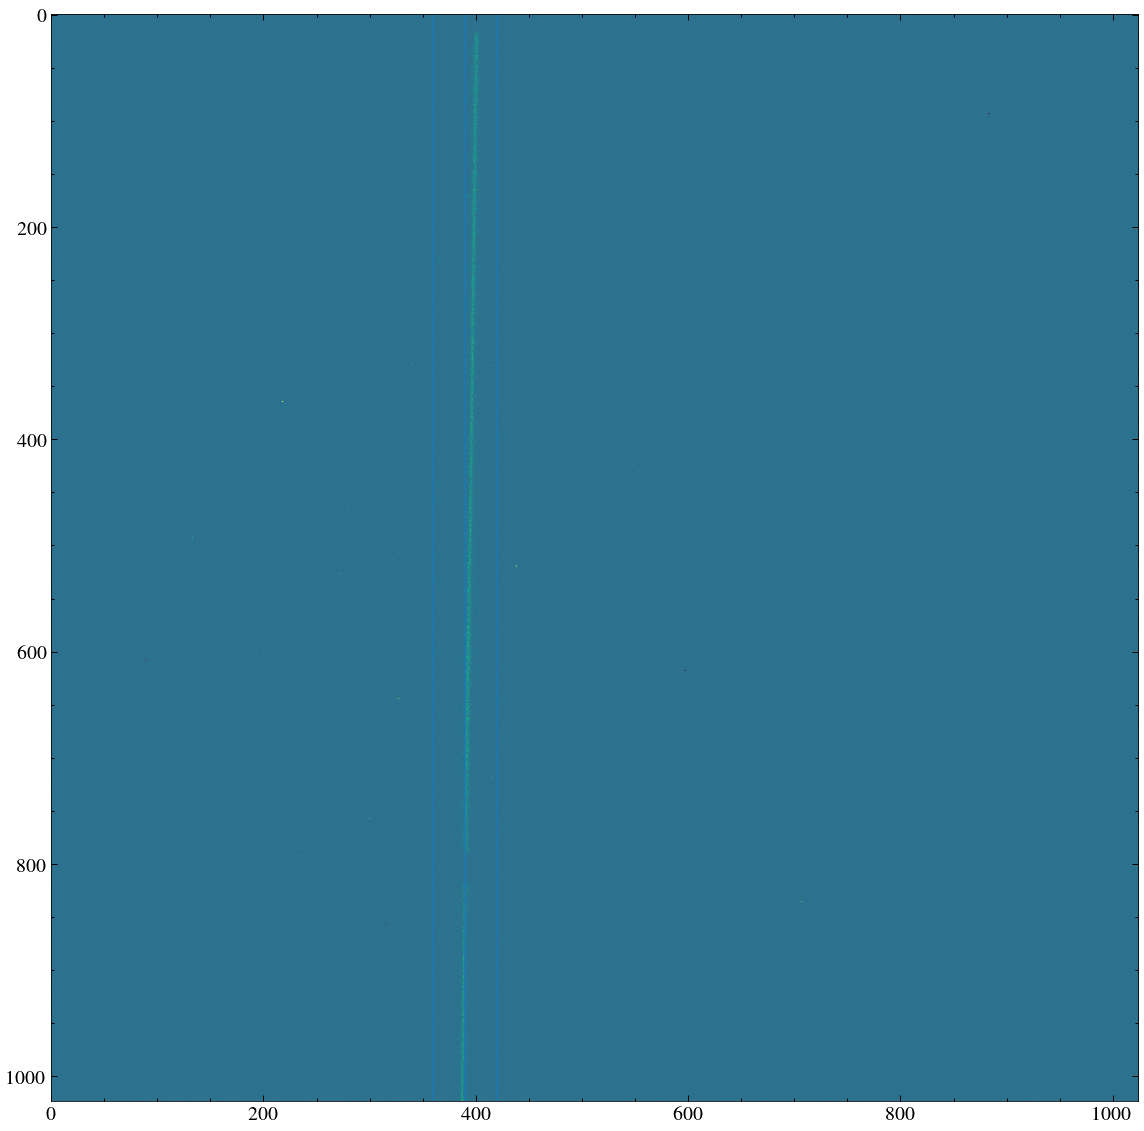

In [47]:
plt.figure(figsize = (20,20))
plt.imshow(data)
plt.axvline(390)
plt.axvline(360)
plt.axvline(420)
#plt.xlim(270, 280)


Good that is the spectrum, not just background. Is the gap at ~800 where they've been over-enthusiastic with Lya removal?

In [49]:
flts[0]

'/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/oddv01030_flt.fits'

In [51]:
rawdt = fits.getdata(d3+'oddv01030_raw.fits')

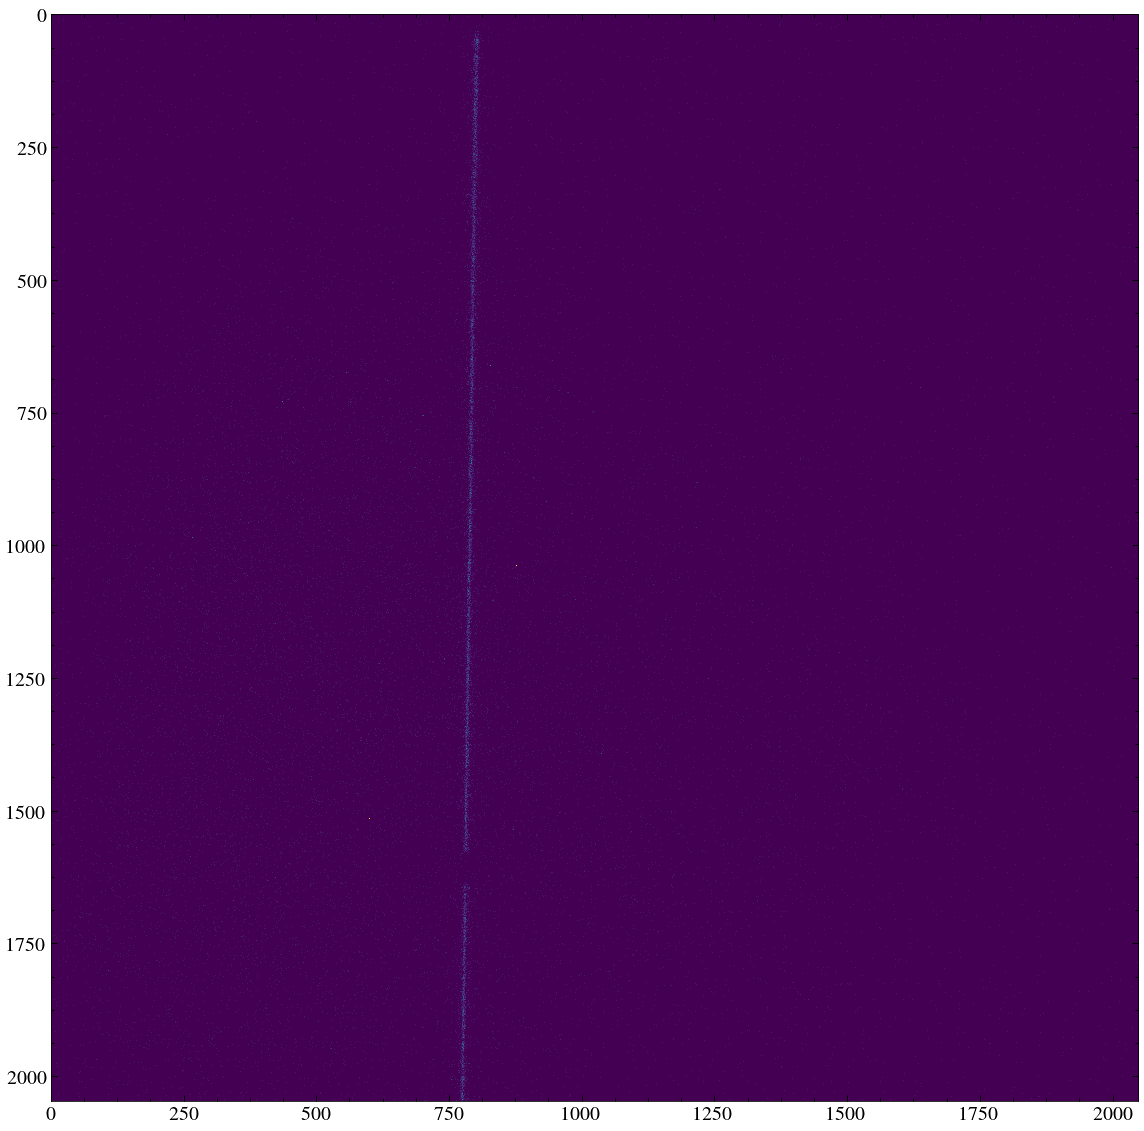

In [53]:
plt.figure(figsize = (20,20))
plt.imshow(rawdt)

Hmm Ism absorption more likely.

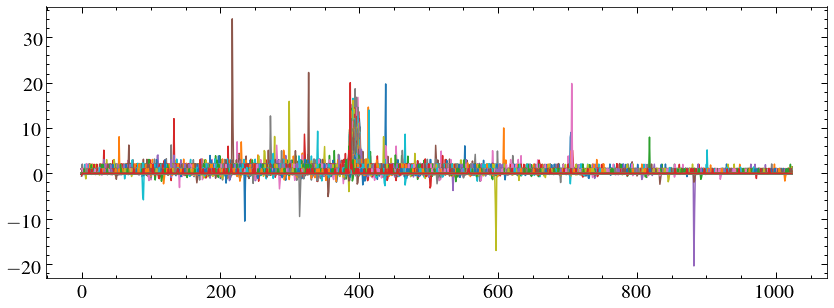

In [56]:
xaxis = np.arange(len(data))
for dt in data:
    plt.plot(xaxis, dt)

In [57]:
hx = fits.open(d3+'oddv01030_x1d.fits')

In [58]:
hx[1].data.names

['SPORDER',
 'NELEM',
 'WAVELENGTH',
 'GROSS',
 'BACKGROUND',
 'NET',
 'FLUX',
 'ERROR',
 'NET_ERROR',
 'DQ',
 'A2CENTER',
 'EXTRSIZE',
 'MAXSRCH',
 'BK1SIZE',
 'BK2SIZE',
 'BK1OFFST',
 'BK2OFFST',
 'EXTRLOCY',
 'OFFSET']

In [61]:
hx[1].data['EXTRLOCY']

array([[551.93744, 551.9386 , 551.9342 , ..., 562.9825 , 563.0025 ,
        563.02246]], dtype=float32)

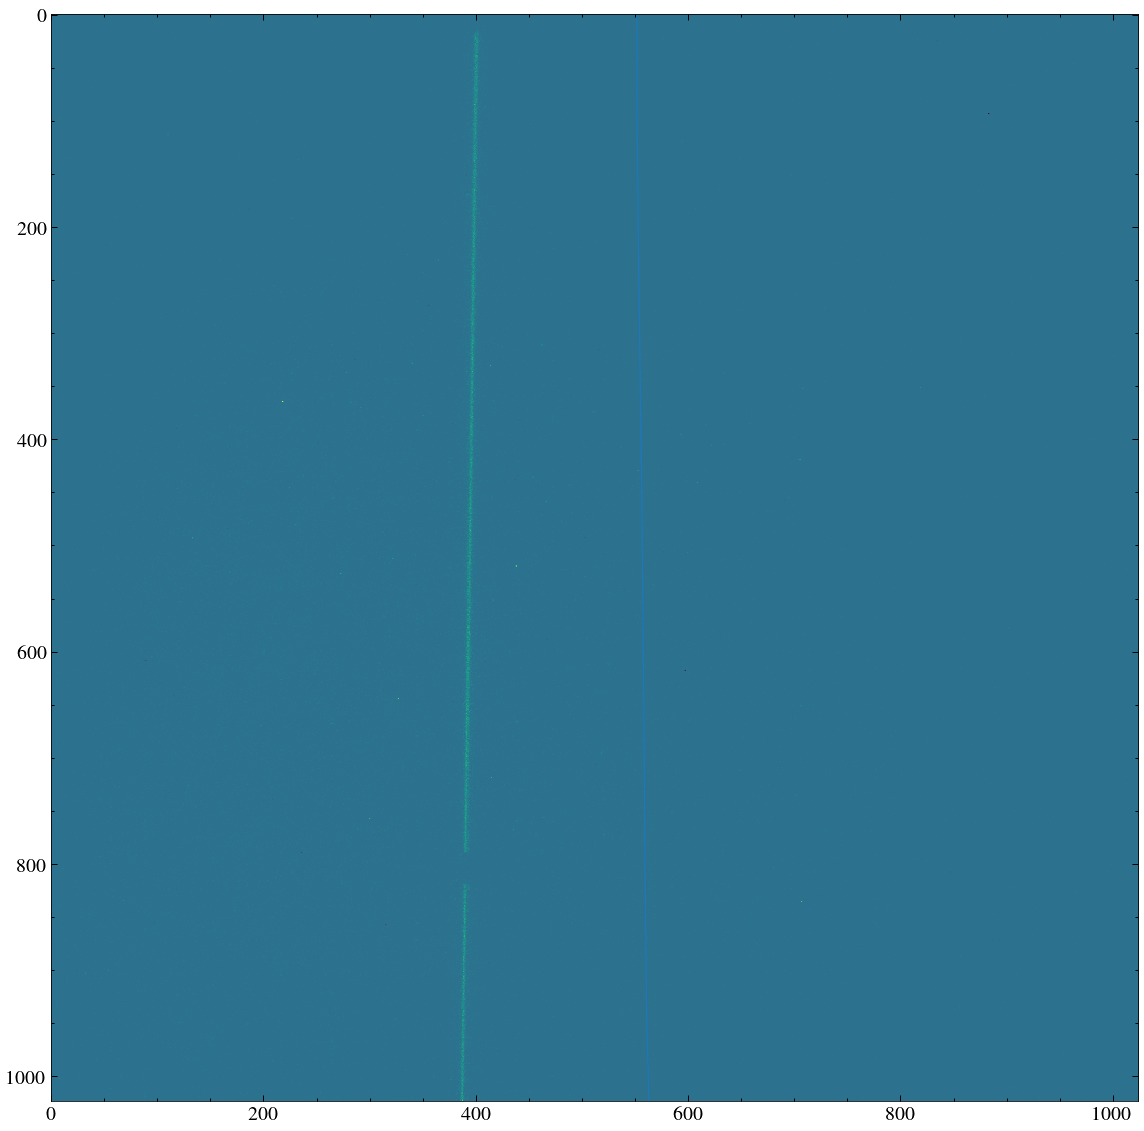

In [62]:
plt.figure(figsize = (20,20))
plt.imshow(data)
plt.plot(hx[1].data['EXTRLOCY'][0], xaxis)

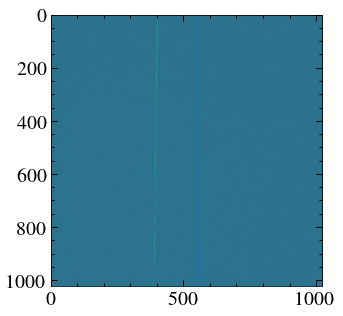

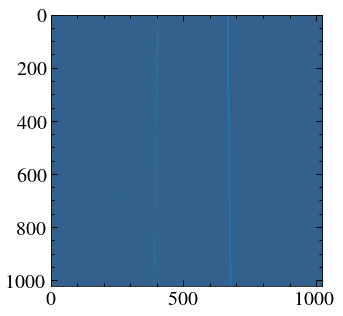

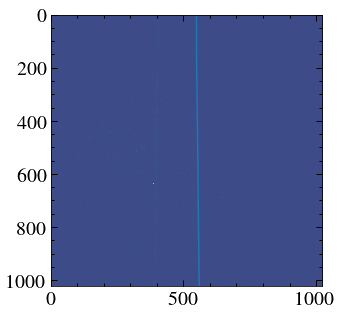

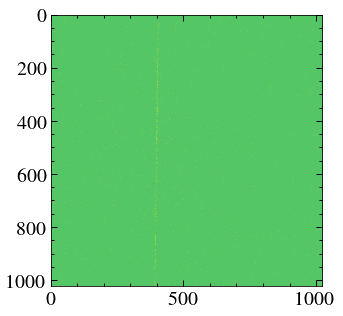

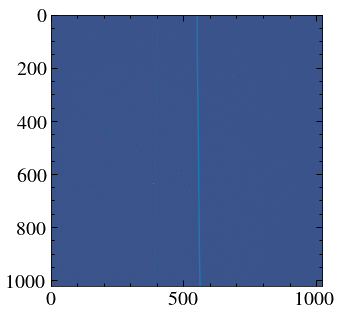

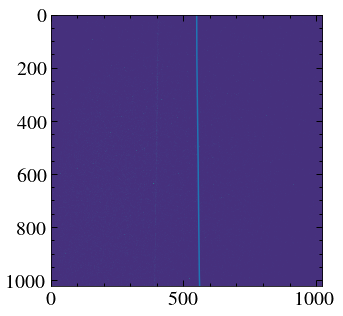

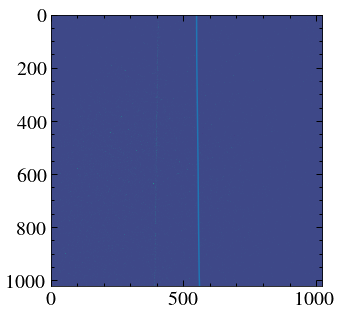

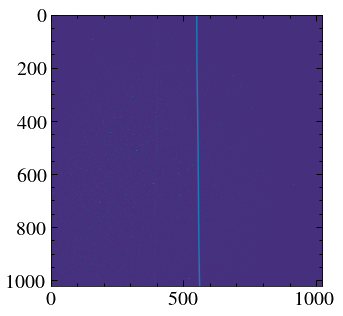

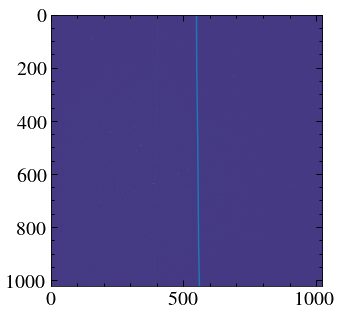

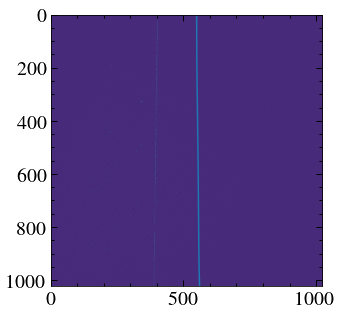

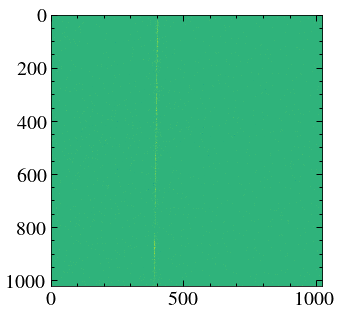

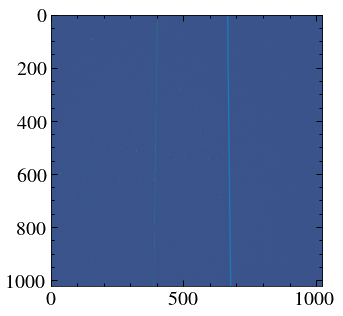

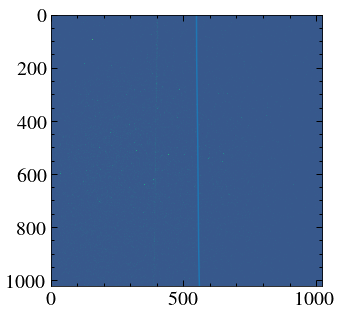

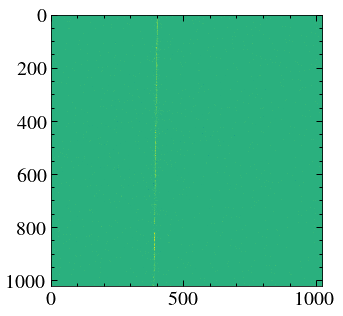

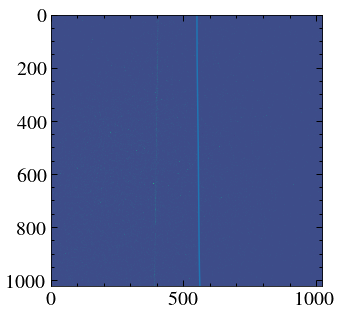

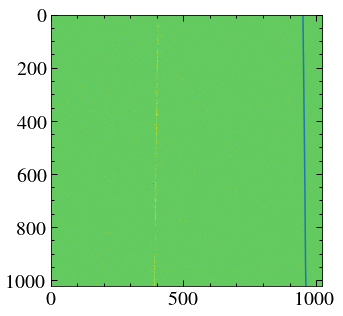

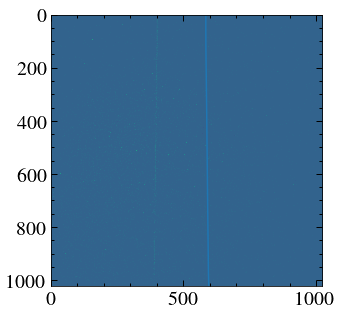

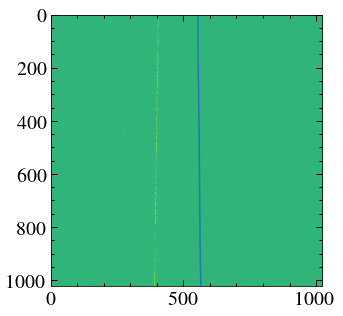

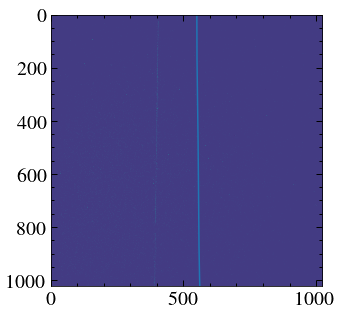

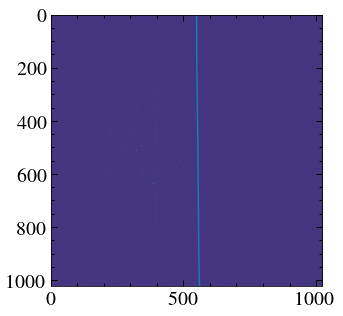

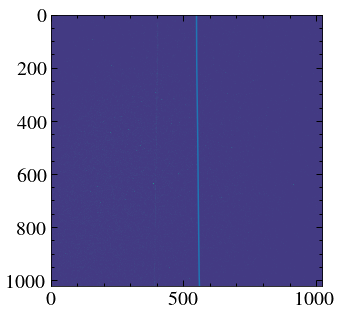

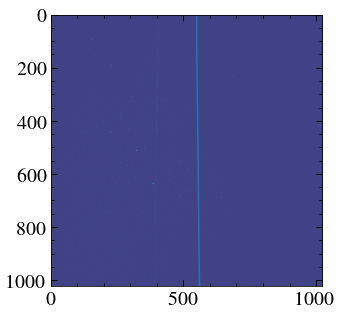

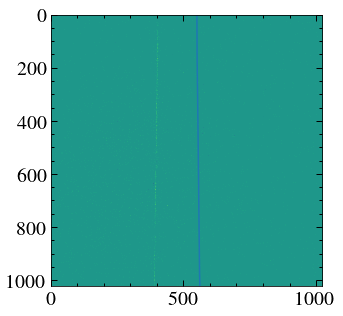

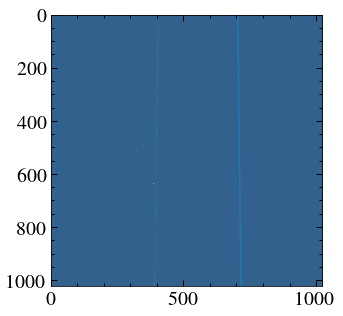

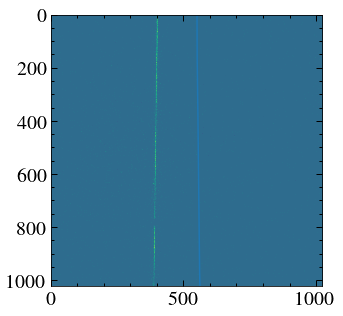

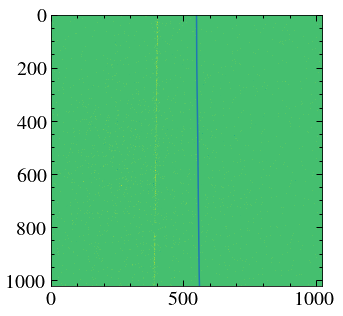

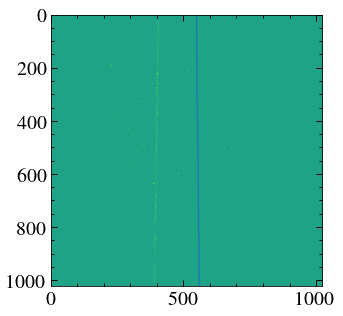

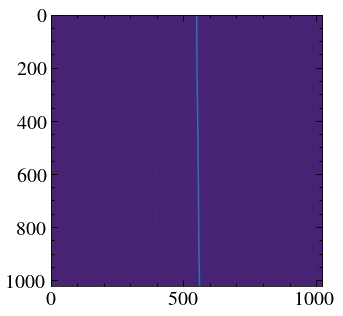

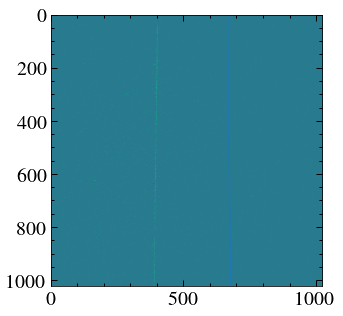

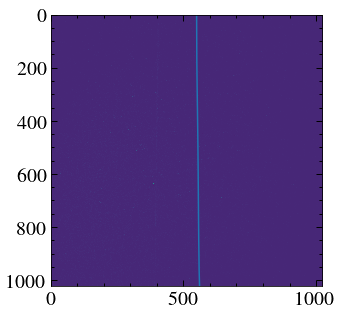

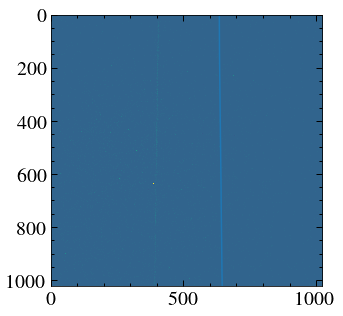

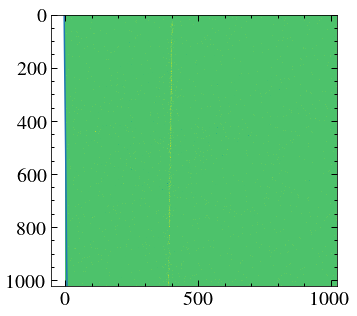

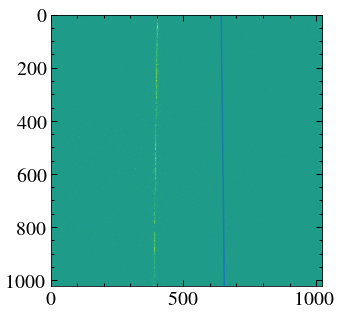

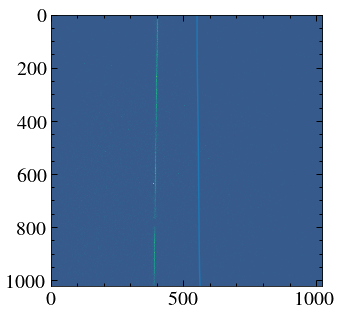

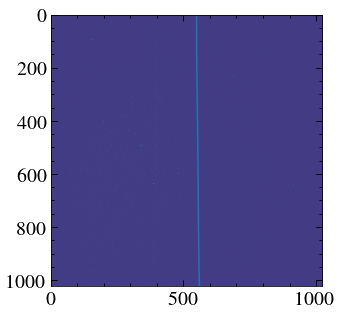

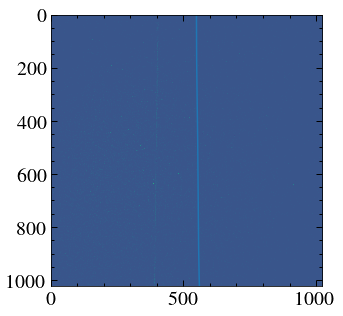

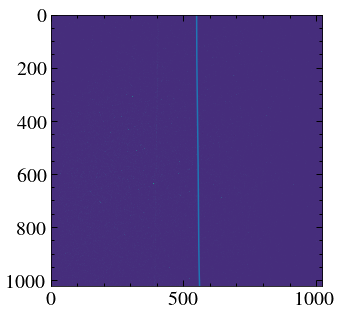

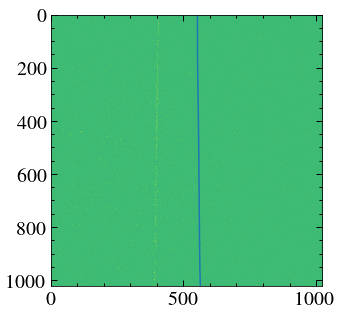

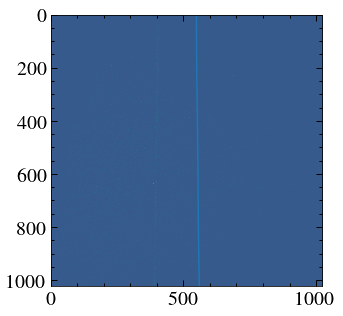

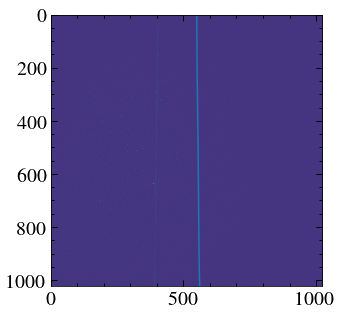

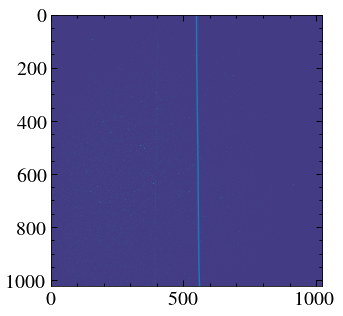

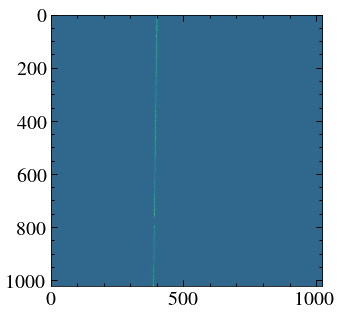

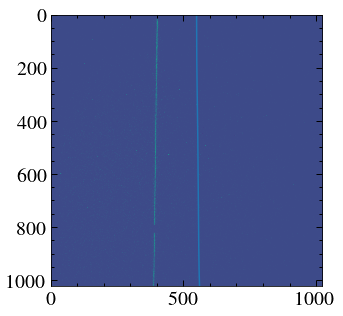

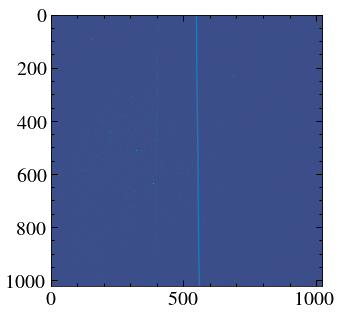

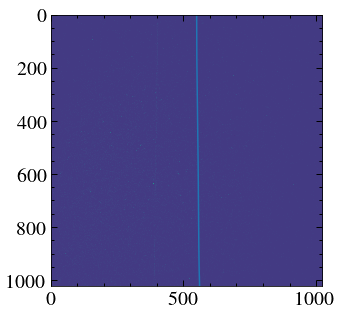

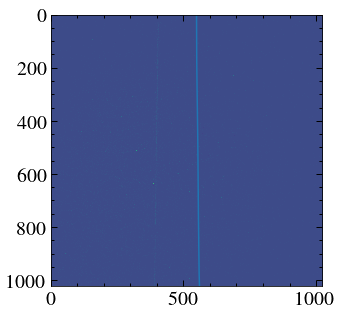

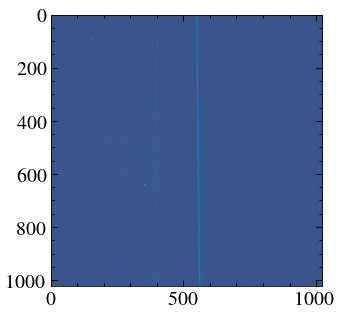

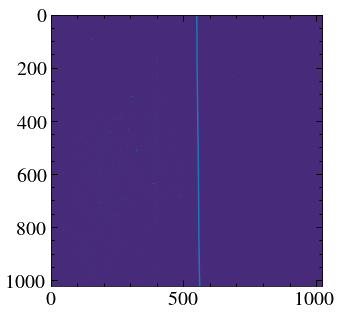

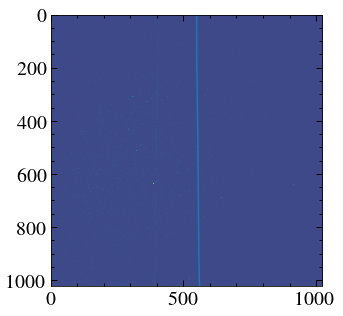

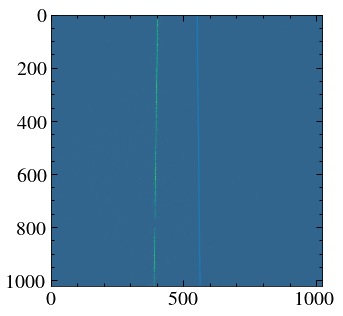

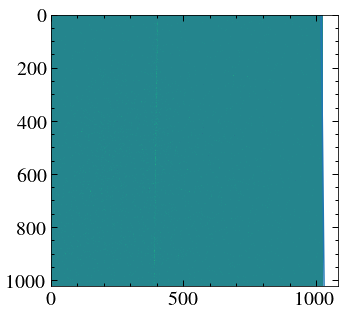

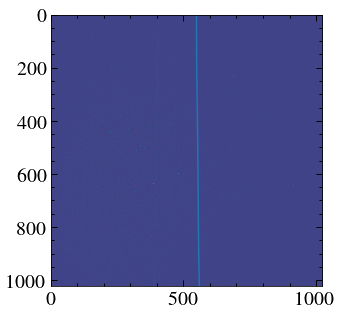

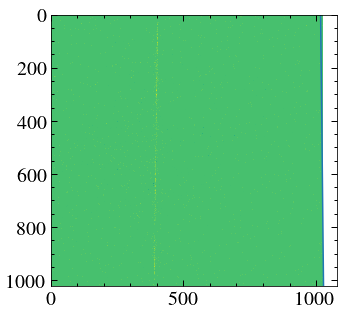

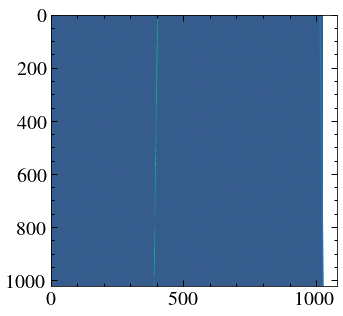

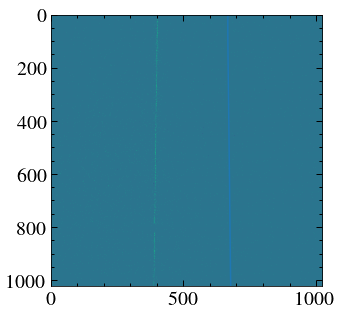

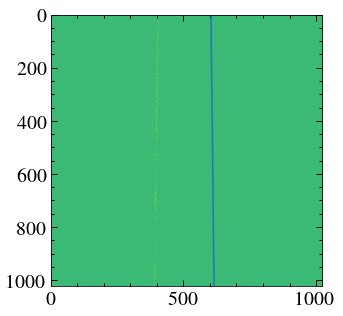

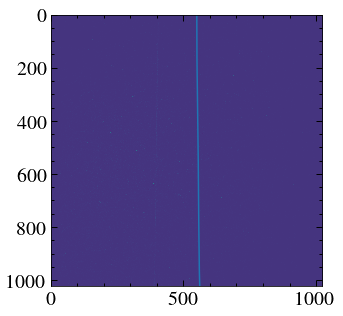

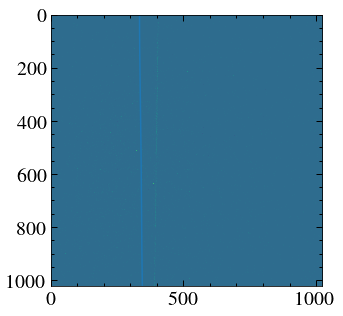

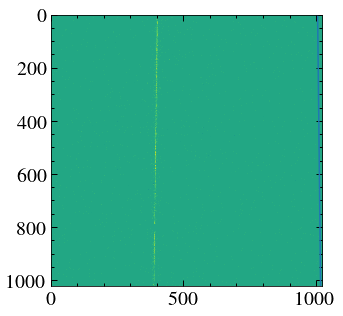

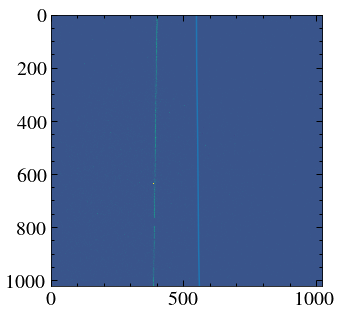

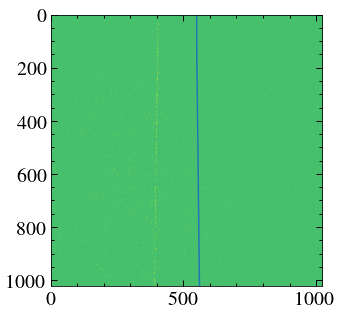

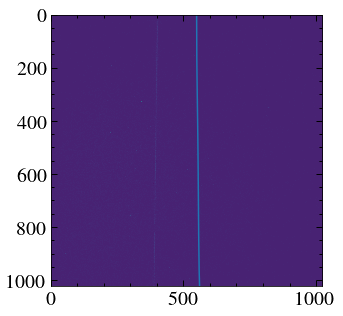

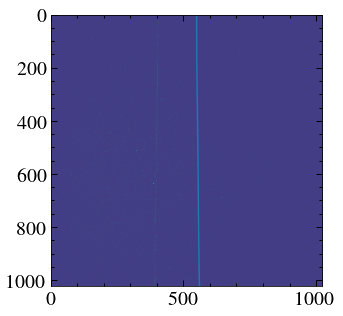

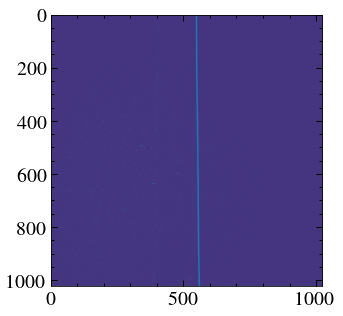

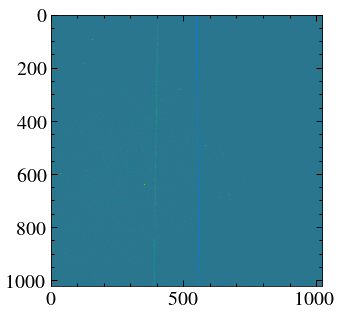

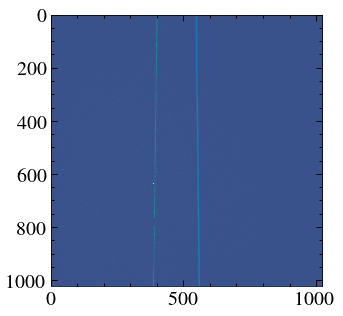

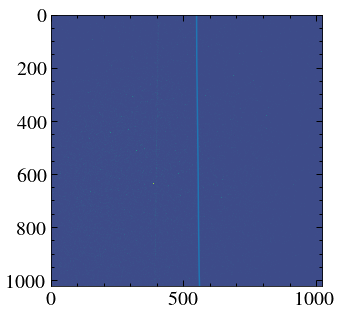

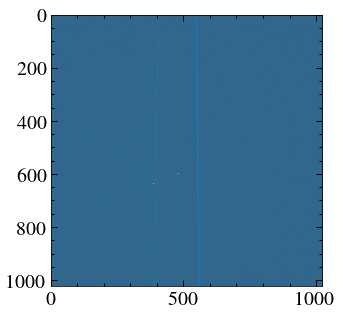

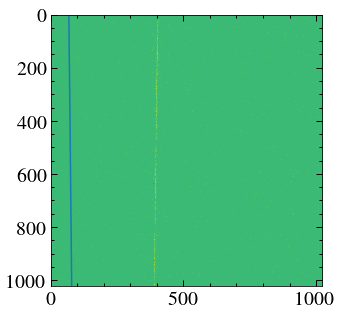

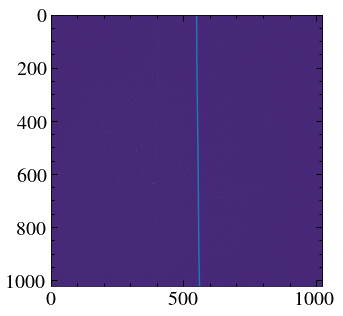

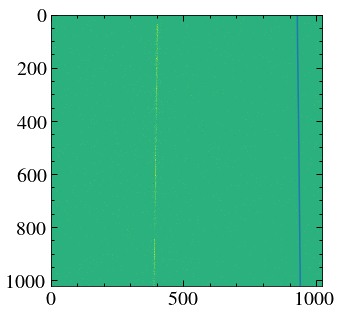

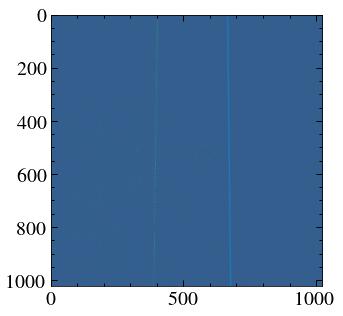

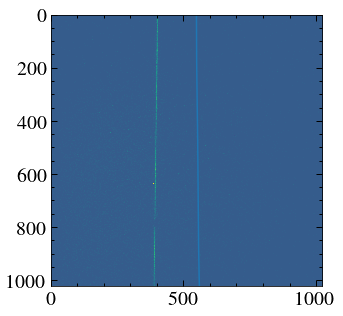

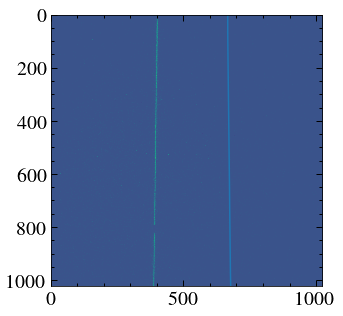

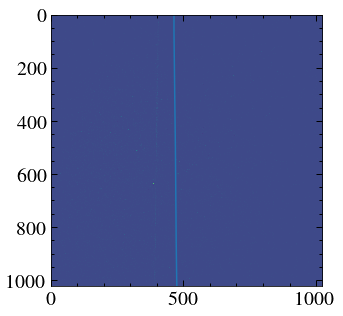

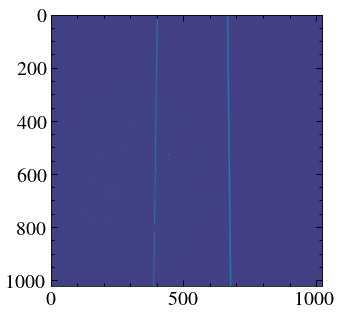

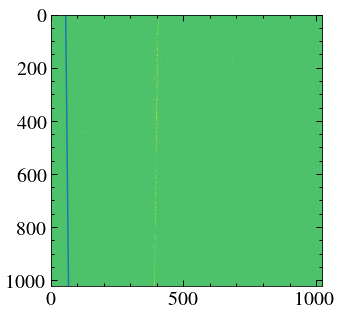

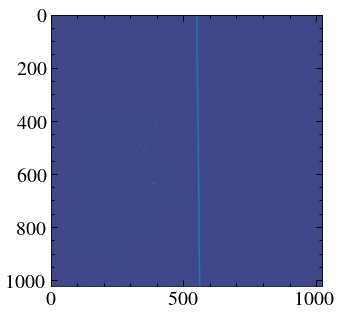

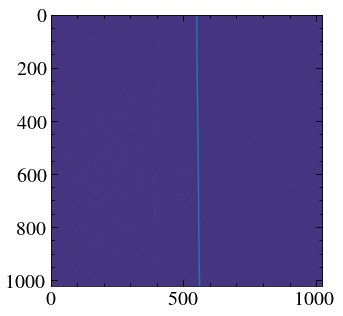

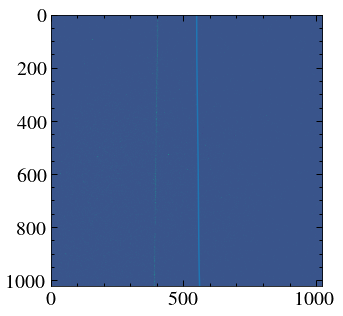

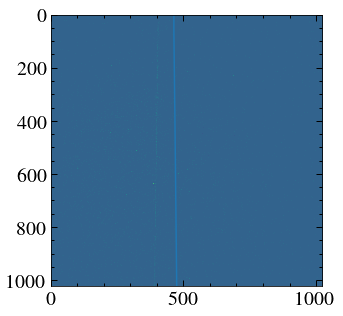

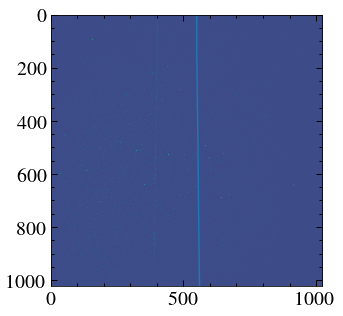

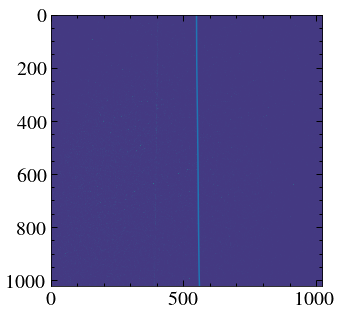

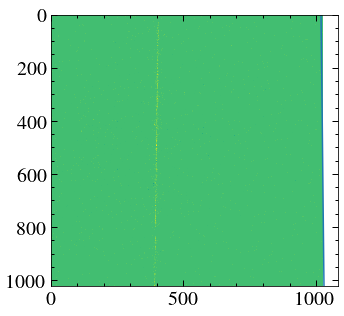

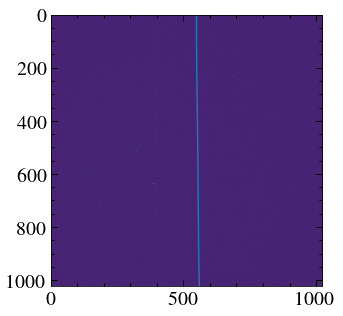

In [71]:
x1ds = glob.glob(d3+'*x1d.fits')
for flt in flts:
    rootname = fits.getheader(flt,0)['ROOTNAME']
    dt = fits.getdata(flt,1)
    plt.imshow(dt)
    if d3+rootname+'_x1d.fits' in x1ds:
        y = fits.getdata(d3+rootname+'_x1d.fits', 1)[0]['EXTRLOCY']
        plt.plot(y, xaxis)
    plt.show()
    

In [68]:
flts

['/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/oddv01030_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhsf1020_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs16030_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs16010_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs30030_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs05030_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs05010_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs31070_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs30040_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/oddv01040_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhsf1010_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhsc2040_flt.fits',
 '/home/david/wo

double check with another spectrum

In [79]:
flt1 = '/home/david/work/muscles/MegaMUSCLES/GJ_674/HST/STIS/odlm21030_flt.fits'
x1d1 = '/home/david/work/muscles/MegaMUSCLES/GJ_674/HST/STIS/odlm21030_x1d.fits'

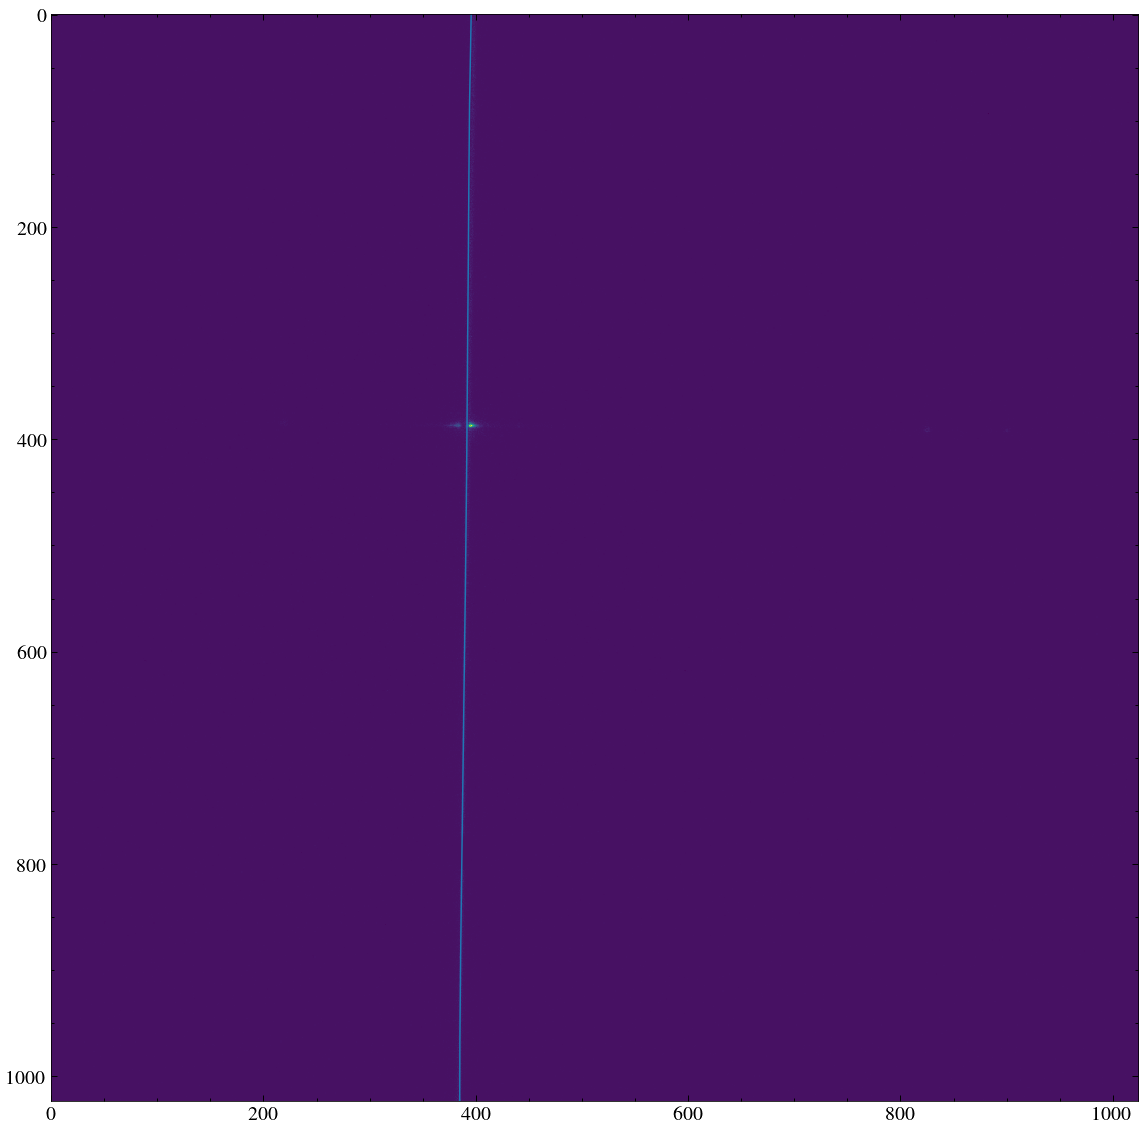

In [147]:
plt.figure(figsize=(20, 20))
dt = fits.getdata(flt1,1)
plt.imshow(dt)
y = fits.getdata(x1d1, 1)[0]['EXTRLOCY'][::-1]
plt.plot(y, xaxis)
plt.show()


In [84]:
os.environ['oref'] = d3

In [165]:
for flt in flts[0:1]:
    rootname = fits.getheader(flt,0)['ROOTNAME']
    stistools.x1d.x1d(flt, output=d3+rootname+'_newtracetest_x1d.fits', verbose=True, trailer='newtrace_recal.trl',a2center=400, maxsrch=10)

Appending to trailer file newtrace_recal.trl
Running x1d on /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/oddv01030_flt.fits
  ['cs6.e', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/oddv01030_flt.fits', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/oddv01030_newtracetest_x1d.fits', '-v', '-back', '-cte', '-disp', '-hel', '-flux', '-c', '400', '-r', '10', '-bm', '-bo', '3', '-a', 'unweighted']


Let's see if that worked:

In [166]:
data = fits.getdata(d3+'/oddv01030_newtracetest_x1d.fits',1)[0]

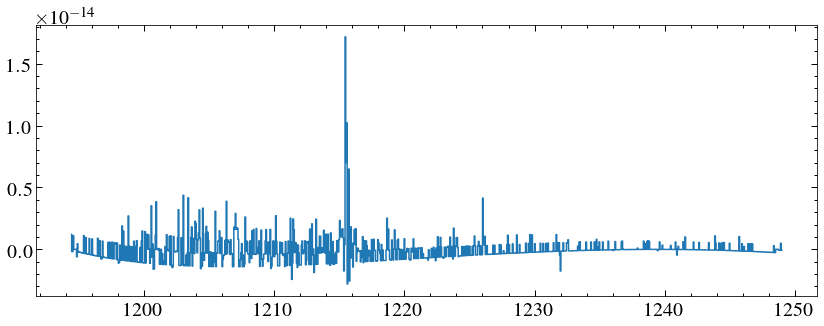

In [167]:
plt.step(data['WAVELENGTH'], data['FLUX'])

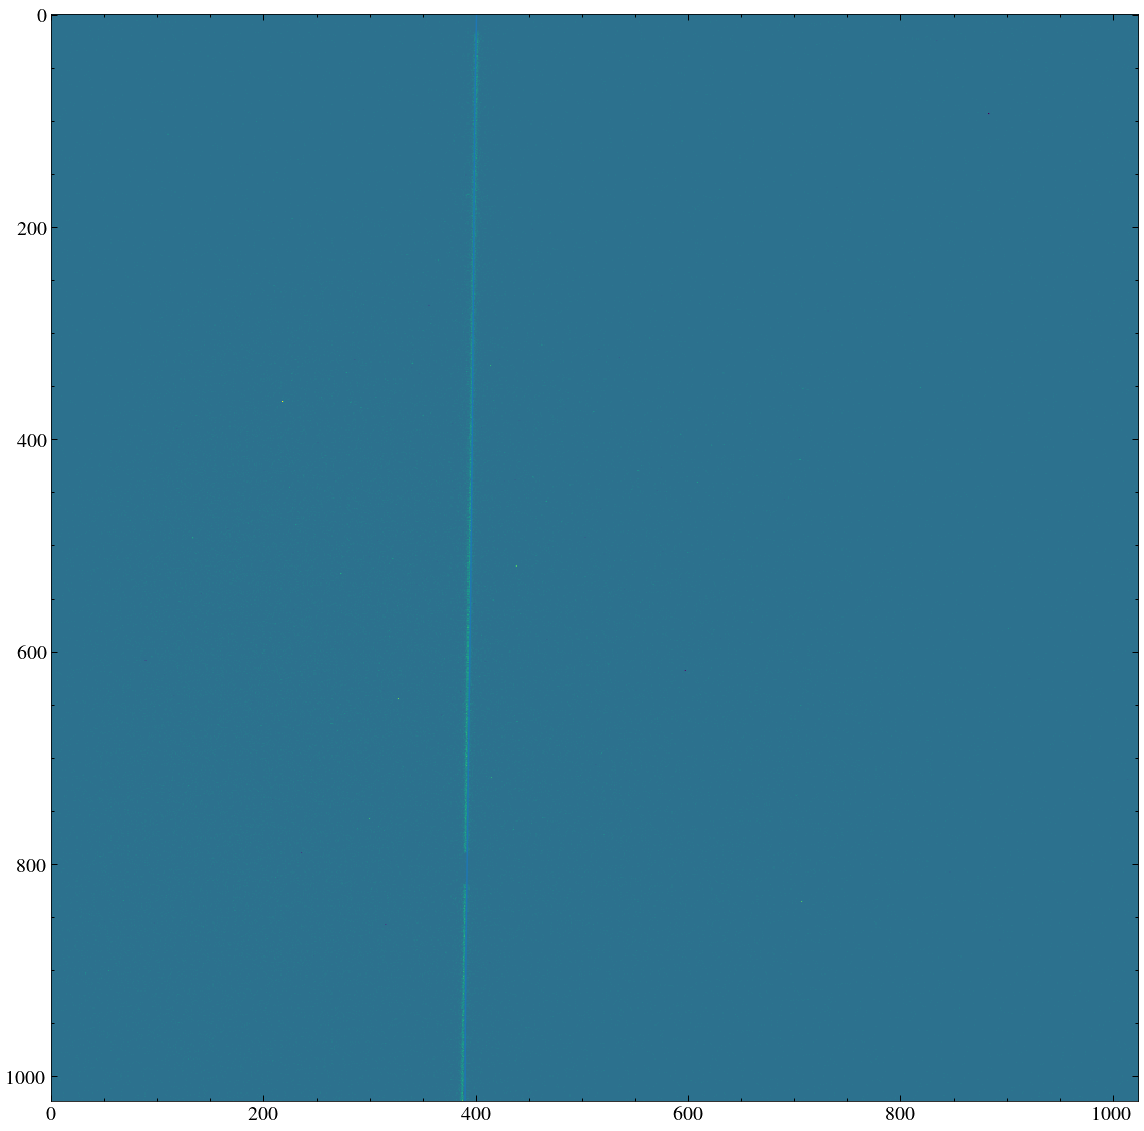

In [168]:
plt.figure(figsize=(20, 20))
dt = fits.getdata(d3+'oddv01030_flt.fits',1)
plt.imshow(dt)
y = data['EXTRLOCY'][::-1]
plt.plot(y, xaxis)
plt.show()

In [169]:
for flt in flts:
    rootname = fits.getheader(flt,0)['ROOTNAME']
    stistools.x1d.x1d(flt, output=d3+'../new_extracts/'+rootname+'_newtrace_x1d.fits', verbose=True, trailer='newtrace_recal.trl',a2center=400, maxsrch=10 )

Appending to trailer file newtrace_recal.trl
Running x1d on /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/oddv01030_flt.fits
  ['cs6.e', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/oddv01030_flt.fits', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/../new_extracts/oddv01030_newtrace_x1d.fits', '-v', '-back', '-cte', '-disp', '-hel', '-flux', '-c', '400', '-r', '10', '-bm', '-bo', '3', '-a', 'unweighted']
Appending to trailer file newtrace_recal.trl
Running x1d on /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhsf1020_flt.fits
  ['cs6.e', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhsf1020_flt.fits', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/../new_extracts/odhsf1020_newtrace_x1d.fits', '-v', '-back', '-cte', '-disp', '-hel', '-flux', '-c', '400', '-r', '10', '-bm', '-bo', '3', '-a', 'unweighted']
Appending to trailer file newtrace_recal.trl
Running x1d on /home/david/work/muscles/trappist-1/hst/

In [114]:
len(flts)

85

57


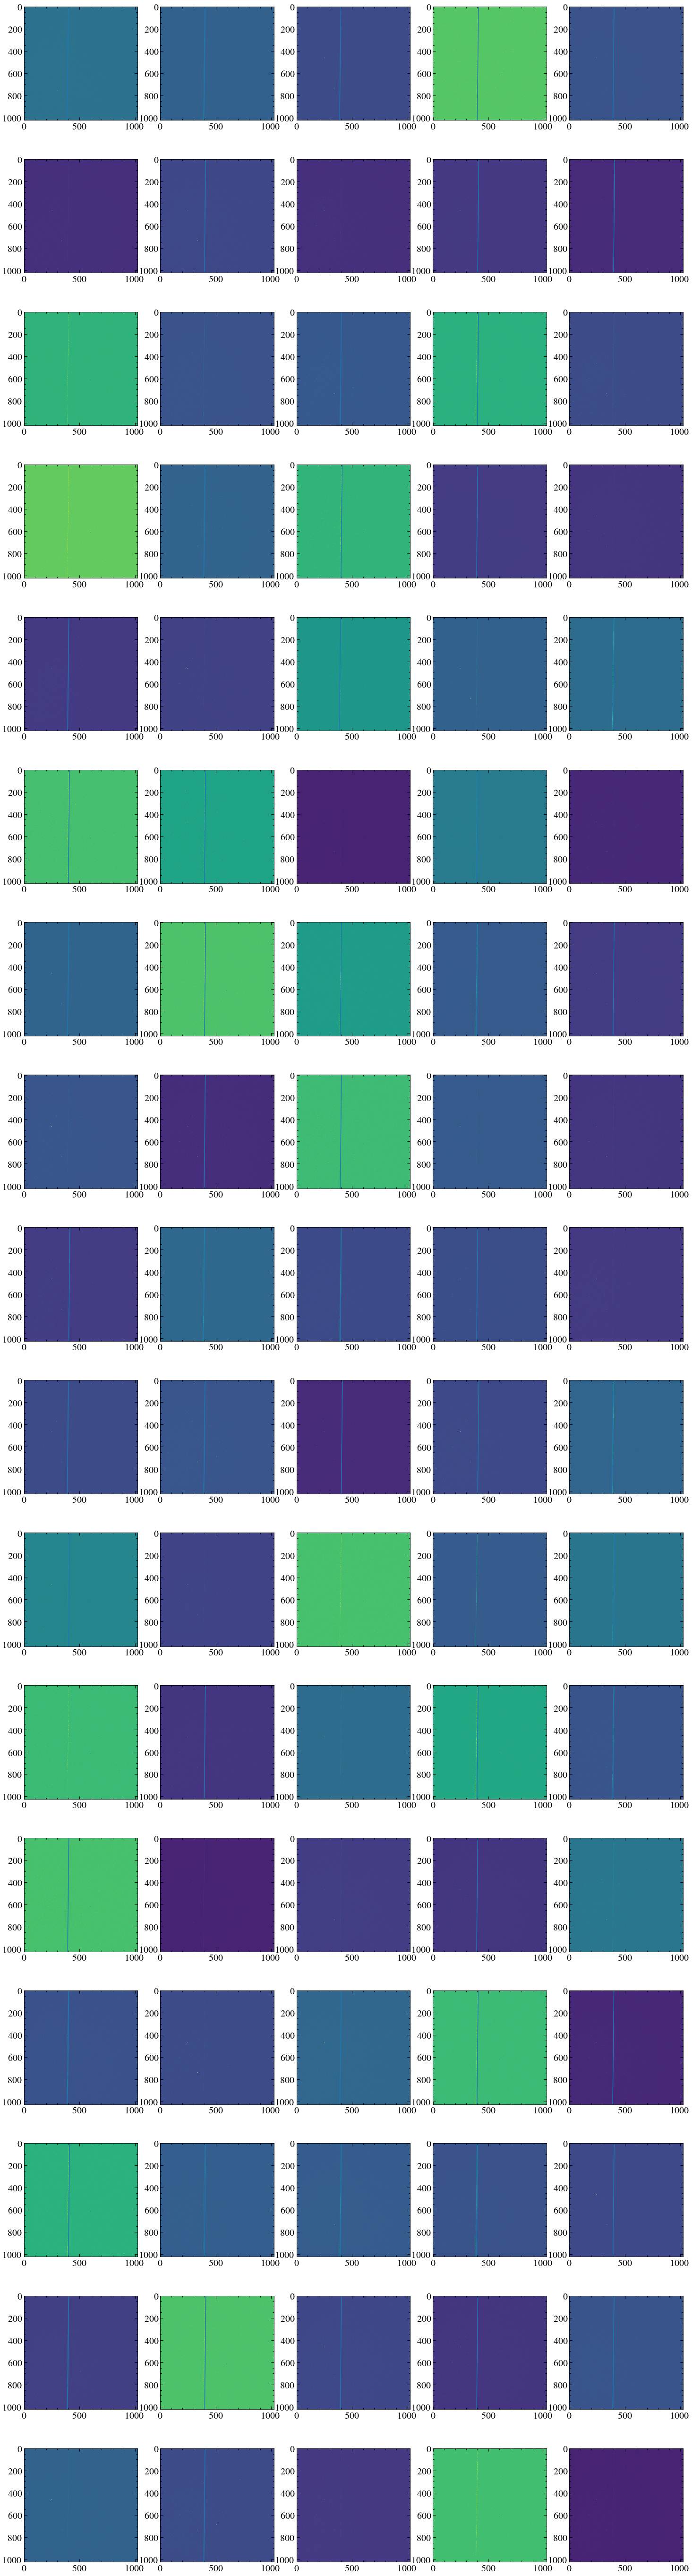

In [170]:
new_x1ds = glob.glob(d3+'../new_extracts/*x1d.fits')
print(len(new_x1ds))
plt.figure(figsize=(25, 100))
for i in range(len(flts)):
    flt = flts[i]
    plt.subplot(17,5,i+1)
    rootname = fits.getheader(flt,0)['ROOTNAME']
    dt = fits.getdata(flt,1)
    plt.imshow(dt)
    if d3+'../new_extracts/'+rootname+'_newtrace_x1d.fits' in new_x1ds:
        y = fits.getdata(d3+'../new_extracts/'+rootname+'_newtrace_x1d.fits', 1)[0]['EXTRLOCY'][::-1]
        plt.plot(y, xaxis)
plt.show()

In [171]:
f_new = []
e_new = []
i = 0
for x in new_x1ds:
    data = fits.getdata(x, 1)[0]
    if i == 0:
        w_new = data['WAVELENGTH']
        f_new.append(data['FLUX'])
        e_new.append(data['ERROR'])
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'])(w_new)
        f_new.append(fi)
        ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'])(w_new)
        e_new.append(ei)
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    #f_new.append(data['FLUX'])
    i +-1
#w_new = data['WAVELENGTH']
f_new = np.mean(np.array(f_new), axis=0)
e_new = np.mean(np.array(e_new), axis=0)


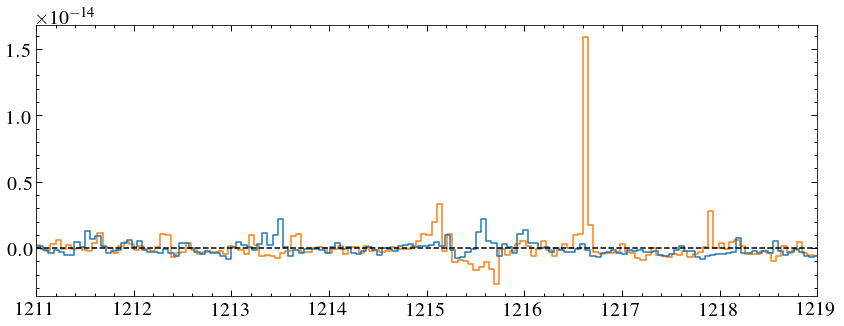

In [172]:
plt.step(w_new, f_new)
plt.step(w_old, f_old, zorder=-1)
plt.xlim(1211, 1219)
plt.axhline(0, ls='--', c='k')


Next steps -fit to the trace to find the correct starting point. Then try B+ background.